##**COURS INTERACTIF: Apprentissage en profondeur avancé avec Keras**

+ *4 heures*
+ *13 Vidéos*
+ *46 exercices*
+ *28 591 participants*
+ *3 950 XP*

<img src="https://www.datacamp.com/statement-of-accomplishment/badge/course/f346607f814e5cc93dc0832d03fc8f2dfa90d4f6.png"/>

###**Description du cours**

+ ***Ce cours vous montre comment résoudre divers problèmes à l'aide de l'API fonctionnelle polyvalente de Keras. Vous commencerez par des réseaux denses multicouches simples (également appelés perceptrons multicouches) et continuerez avec des architectures plus complexes. Le cours expliquera comment créer des modèles avec plusieurs entrées et une seule sortie, ainsi que comment partager les poids entre les couches d'un modèle. Nous couvrirons également des sujets avancés tels que les intégrations de catégories et les réseaux à sorties multiples. Si vous avez toujours voulu former un réseau qui fait à la fois de la classification et de la régression, alors ce cours est fait pour vous !***

####**1) L'API fonctionnelle de Keras**

+ ***Dans ce chapitre, vous vous familiariserez avec les bases de l'API fonctionnelle de Keras. Vous allez créer un réseau fonctionnel simple à l'aide de blocs de construction fonctionnels, l'adapter aux données et faire des prédictions.***

|OBJECTIFS|
|---------|
Entrée Keras et couches denses
Couches d'entrée
Couches denses
Couches de sortie
Construire et compiler un modèle
Construire un modèle
Compiler un modèle
Visualiser un modèle
Ajuster et évaluer un modèle
Ajuster le modèle aux données de basket-ball du tournoi
Évaluer le modèle sur un jeu de test

####**2) Réseaux à deux entrées utilisant des plongements catégoriels, des couches partagées et des couches de fusion**

+ ***Dans ce chapitre, vous allez créer des réseaux à deux entrées qui utilisent des représentations vectorielles continues catégorielles pour représenter des données à cardinalité élevée, des couches partagées pour spécifier des blocs de construction réutilisables et fusionner des couches pour joindre plusieurs entrées à une seule sortie. À la fin de ce chapitre, vous disposerez des éléments de base pour concevoir des réseaux de neurones avec des flux de données complexes.***

|OBJECTIFS|
|---------|
Incorporations de catégories
Définir la recherche d'équipe
Définir le modèle d'équipe
Couches partagées
Définir deux entrées
Rechercher les deux entrées dans le même modèle
Fusionner les calques
Couche de sortie utilisant une couche partagée
Modèle utilisant deux entrées et une sortie
Prédire à partir de votre modèle
Ajuster le modèle aux données d'entraînement de la saison régulière
Évaluer le modèle sur les données de test du tournoi

####**3) Entrées multiples : 3 entrées (et au-delà !)**

+ ***Dans ce chapitre, vous allez étendre votre modèle à 2 entrées à 3 entrées et apprendre à utiliser les fonctions de résumé et de tracé de Keras pour comprendre les paramètres et la topologie de vos réseaux de neurones. À la fin du chapitre, vous comprendrez comment étendre un modèle à 2 entrées à 3 entrées et au-delà.***

|OBJECTIFS|
|---------|
Modèles à trois entrées
Créez une couche d'entrée pour la maison ou l'extérieur
Faire un modèle et le compiler
Ajuster le modèle et évaluer
Résumer et tracer des modèles
Résumés des modèles
Tracé de modèles
Modèles empilables
Ajouter les prédictions du modèle aux données du tournoi
Créer une couche d'entrée avec plusieurs colonnes
Adapter le modèle
Évaluer le modèle

####**4) Sorties multiples**

+ ***Dans ce chapitre, vous allez construire des réseaux de neurones avec plusieurs sorties, qui peuvent être utilisés pour résoudre des problèmes de régression avec plusieurs cibles. Vous construirez également un modèle qui résout simultanément un problème de régression et un problème de classification.***

|OBJECTIFS|
|---------|
Modèles à deux sorties
Modèle simple à deux sorties
Adapter un modèle à deux sorties
Inspectez le modèle (I)
Évaluer le modèle
Modèle unique pour la classification et la régression
Classification et régression dans un modèle
Compiler et ajuster le modèle
Inspectez le modèle (II)
Évaluer sur de nouvelles données avec deux métriques
Conclure


In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 12)
sns.set_style('darkgrid')

####**1. Entrée Keras et couches denses**

+ ***Salut! Je m'appelle Zach Deane-Mayer, et dans ce cours, je vais vous enseigner des concepts avancés d'apprentissage en profondeur à l'aide de l'API fonctionnelle keras. Vous apprendrez à créer des modèles keras fonctionnels, y compris des sujets avancés tels que les couches partagées, les intégrations catégorielles, les entrées multiples et les sorties multiples. L'API fonctionnelle de Keras est extrêmement simple, mais extrêmement puissante. À la fin de ce cours, vous construirez un modèle capable de résoudre à la fois un problème de régression et un problème de classification.***

####**2. Plan de cours**

+ ***Le chapitre 1 est un rappel sur la construction de modèles simples, où vous apprendrez à utiliser l'API fonctionnelle de keras. Dans le chapitre 2, vous construirez un modèle Keras avec 2 entrées. Au chapitre 3, vous apprendrez à généraliser votre modèle à 2 entrées à 3 entrées ou plus. Et enfin, au chapitre 4, vous construirez des modèles avec plusieurs sorties qui peuvent résoudre plusieurs problèmes.***

####**3. Ensembles de données de cours : données sur le basketball universitaire, 1989-2017**

+ ***Vous utiliserez deux ensembles de données de matchs de basketball collégial de collèges américains. Le premier ensemble de données provient de la saison régulière et contient les données suivantes : les identifiants des 2 équipes qui ont joué, si la première équipe était à domicile ou à l'extérieur, si la première équipe a gagné ou perdu le match, et de combien de points la première équipe gagné ou perdu. Pour l'ensemble de données du tournoi, vous avez également la "graine" du tournoi, qui est un classement avant le tournoi pour chaque équipe. Ces graines vont de 1 à 16, où les 4 meilleures équipes obtiennent une graine de 1 et les 4 pires équipes obtiennent une graine de 16. Vous utiliserez la différence entre les graines des deux équipes comme entrée dans votre modèle.***

####**4. Ensembles de données de cours : données sur le basketball universitaire, 1989-2017**

+ ***Voici les cinq premières lignes des deux ensembles de données. Vous pouvez voir que les variables d'équipe sont encodées sous forme d'entiers et que l'ensemble de données du tournoi comporte une colonne supplémentaire : la différence entre les têtes de série du tournoi pour les deux équipes. Outre la différence de départ, les deux ensembles de données ont des colonnes identiques. Au cours d'une année donnée, la composition d'une équipe reste relativement constante, mais d'une année à l'autre, elle peut beaucoup changer, à mesure que les seniors obtiennent leur diplôme et que les étudiants de première année commencent. Par conséquent, pour chaque année, chaque école reçoit un identifiant entier unique.***

####**5. Entrées et sorties**

+ ***Les modèles Keras, dans leur forme la plus simple, sont fondamentalement composés de 2 parties : une couche d'entrée et une couche de sortie.***

####**6. Entrées**

+ ***Pour commencer, je vais définir un modèle keras très simple, qui n'attend qu'une seule entrée. Je le spécifie en utilisant la fonction Input() du module tensorflow.keras.layers. Le nombre de colonnes dans l'entrée est spécifié à l'aide du paramètre de forme. Cela indique au modèle la quantité de données à attendre. Notez que l'argument shape attend un tuple.***

####**7. Entrées**

+ ***La fonction Input renvoie un "tenseur". Si vous imprimez ce tenseur, vous verrez qu'il s'agit d'un objet KerasTensor, ce qui indique qu'il est prêt à être utilisé par notre modèle en entrée.***

####**8. Sorties**

+ ***Maintenant que nous avons défini notre couche d'entrée, définissons la couche de sortie. Les sorties en keras sont le plus souvent une seule couche dense, qui spécifie la forme de la sortie attendue. Dans ce cas, nous nous attendons à ce que notre modèle prédise une seule valeur, nous transmettons donc une unité à la couche dense.***

####**9. Sorties**

+ ***Si vous imprimez la couche de sortie, le résultat n'est PAS un tenseur tensorflow. C'est une fonction qui prend un tenseur en entrée et produit un tenseur en sortie. La différence entre les couches et les tenseurs est essentielle pour comprendre l'API fonctionnelle de Keras. Les couches sont utilisées pour construire un modèle d'apprentissage en profondeur et les tenseurs sont utilisés pour définir le flux de données à travers le modèle.***

####**10. Connexion des entrées aux sorties**

+ ***Dans ce cas, la couche d'entrée définit un tenseur, que nous passons à la fonction output_layer().***

####**11. Connexion des entrées aux sorties**

+ ***La sortie finale de notre modèle est un KerasTensor.***

####**12. Entraînons-nous !**

+ ***Il est temps pour vous de créer des couches !***

###**EXERCICES**

####**Couches d'entrée**

+ ***La première étape de la création d'un modèle de réseau neuronal consiste à définir la couche d'entrée . Cette couche prend des données brutes, généralement sous la forme de tableaux numpy. La forme de la couche d'entrée définit le nombre de variables que votre réseau de neurones utilisera. Par exemple, si les données d'entrée ont 10 colonnes, vous définissez une couche d'entrée avec une forme de (10,).***

+ *Dans ce cas, vous n'utilisez qu'une seule entrée dans votre réseau.*

####**Instructions**

+ Importez la fonction Input de calque à partir de keras.layers.
+ Créez un calque d'entrée de la forme 1.

In [2]:
# Import Input from keras.layers
from keras.layers import Input

# Create an input layer of shape 1
input_tensor = Input(shape=(1,))

In [3]:
print(input_tensor)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


***Super! N'oubliez pas que la couche d'entrée permet à votre modèle de charger des données.***

####**Couches denses**

+ ***Une fois que vous avez un calque d'entrée, l'étape suivante consiste à ajouter un calque dense .***

+ ***Les couches denses apprennent une matrice de poids, où la première dimension de la matrice est la dimension des données d'entrée et la deuxième dimension est la dimension des données de sortie. Rappelez-vous que votre couche d'entrée a une forme de 1. Dans ce cas, votre couche de sortie aura également une forme de 1. Cela signifie que la couche Dense apprendra une matrice de poids 1x1.***

+ *Dans cet exercice, vous allez ajouter une couche dense à votre modèle, après la couche d'entrée.*

####**Instructions**

+ Importez la fonction de calque Dense à partir de keras.layers.
+ Créez une couche dense avec 1 unité.
+ Passer input_tensor à output_layer().

In [4]:
# Load layers
from keras.layers import Input, Dense

# Input layer
input_tensor = Input(shape=(1,))

# Dense layer
output_layer = Dense(1)

# Connect the dense layer to the input_tensor
output_tensor = output_layer(input_tensor)

In [5]:
print(output_tensor)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")


***Bon travail! Ce réseau prendra l'entrée, lui appliquera un coefficient linéaire et renverra le résultat.***

####**Couches de sortie**
+ ***Les calques de sortie sont simplement des calques denses ! Les couches de sortie sont utilisées pour réduire la dimension des entrées à la dimension des sorties. Vous en apprendrez plus sur les dimensions de sortie au chapitre 4, mais pour l'instant, vous utiliserez toujours une seule sortie dans vos réseaux de neurones, ce qui équivaut à une couche dense Dense(1) avec une seule unité.***

####**Instructions**

+ Importez les fonctions Input et Dense depuis keras.layers.
+ Créez un calque d'entrée de la forme 1.
+ Encore une fois, créez une couche dense avec 1 unité et passez input_tensor directement dessus.

In [6]:
# Load layers
from keras.layers import Input, Dense

# Input layer
input_tensor = Input(shape=(1,))

# Create a dense layer and connect the dense layer to the input_tensor in one step
# Note that we did this in 2 steps in the previous exercise, but are doing it in one step now
output_tensor = Dense(1)(input_tensor)

In [7]:
print(output_tensor)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_1/BiasAdd:0', description="created by layer 'dense_1'")


***La couche de sortie permet à votre modèle de faire des prédictions.***

####**1. Modèles Keras**

+ ***Dans cette leçon, je vais vous montrer comment transformer la collection de couches que vous avez assemblée dans la première leçon en un modèle réel que vous pouvez ajuster aux données, puis utiliser pour prédire sur de nouvelles données.***

####**2. Modèles Keras**

+ ***Je vais commencer par les deux calques keras simples que vous avez définis dans la leçon 1. Notez que j'ai pris un raccourci ici. Plutôt que de définir la couche de sortie sur une ligne, puis le tenseur de sortie sur la suivante, j'utilise une ligne pour créer la fonction de couche, puis l'appeler pour produire un tenseur. Il y a 2 jeux de parenthèses dans cette ligne, car nous créons tous les deux la fonction et l'appelons ensuite dans la même ligne.***

####**3. Modèles Keras**

+ ***Pour créer un modèle, il vous suffit d'importer la classe `Model() de tensorflow.keras.models` et de transmettre vos entrées et sorties à cette classe. Dans ce cas, nous n'avons qu'une seule entrée et une seule sortie, que nous passons directement au modèle. Cependant, plus tard dans ce cours, vous travaillerez avec plusieurs entrées et plusieurs sorties, auquel cas vous passerez des listes d'entrées ou des listes de sorties au modèle.***

####**4. Compiler un modèle**

+ ***Enfin, vous devez compiler le modèle avant de l'adapter aux données. L'étape de compilation finalise le modèle et le rend complètement prêt à être utilisé pour l'ajustement et la prédiction. Lors de la compilation, vous sélectionnez un optimiseur. J'utilise presque toujours l'optimiseur "adam", et vous constaterez qu'il donne généralement de bons résultats. Lors de la compilation, vous sélectionnez également une fonction de perte. Dans ce cas, nous utilisons l'erreur absolue moyenne, qui est une bonne fonction d'erreur à usage général pour les modèles Keras, car elle est un peu moins sensible aux valeurs aberrantes. Vous pouvez également utiliser l'erreur quadratique moyenne, ce qui équivaudrait à une régression linéaire traditionnelle.***

####**5. Résumez le modèle**

+ ***Avant d'ajuster mes modèles, j'aime aussi les résumer. Vous pouvez le faire en appelant la méthode `summary()` sur l'objet modèle. Cela vous donne un joli tableau des couches du modèle, afin que vous puissiez confirmer qu'elles correspondent à vos attentes. Dans ce cas, vous voyez votre couche d'entrée et votre couche de sortie. La couche de sortie a 2 paramètres, ce qui est logique, car vous avez 1 entrée et une sortie. Le modèle que vous avez défini ici est un modèle de régression linéaire standard, équivalent à $y = m*x + b$. m et b sont les 2 paramètres. Dans la terminologie de la régression linéaire, m est la pente et b est l'ordonnée à l'origine. Dans la terminologie de keras, m est le poids de la couche dense et b est le biais de la couche dense.***

####**6. Modèle de tracé à l'aide de keras**

+ ***Il est également utile de tracer le modèle avant de l'adapter. Un tracé vous donne un peu plus d'informations qu'un résumé. Il vous montre comment les couches se connectent visuellement. Dans ce cas, la couche d'entrée se connecte directement à la couche de sortie, qui est Dense. Notez que, dans le code de cet exemple, j'ai nommé la couche dense. Les noms sont utiles lorsque vous examinez des tracés de modèle, pour vous aider à savoir quelle couche du tracé correspond à quelle couche du code. plot_model() enregistre l'image dans un fichier, que nous pouvons ensuite afficher à l'aide des fonctions imread() et imshow() de matplotlib, comme indiqué ici.***

####**7. Entraînons-nous !**

+ ***Maintenant c'est ton tour.***

###**EXERCICES**
####**Construire un modèle**
+ ***Une fois que vous avez défini une couche d'entrée et une couche de sortie, vous pouvez créer un modèle Keras. L'objet modèle est la façon dont vous indiquez à Keras où le modèle commence et s'arrête : où les données entrent et où les prédictions sortent.***

####**Instructions**

+ Importer Model depuis keras.models pour créer un modèle keras.
+ Utilisez la couche d'entrée et la couche de sortie que vous avez déjà définies comme entrée et sortie du modèle.

In [8]:
# Input/dense/output layers
from keras.layers import Input, Dense
input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)

# Build the model
from keras.models import Model
model = Model(input_tensor, output_tensor)

***Ce modèle est un réseau de neurones complet, prêt à apprendre des données et à faire des prédictions.***

####**Compiler un modèle**

+ ***La dernière étape de la création d'un modèle est sa compilation . Maintenant que vous avez créé un modèle, vous devez le compiler avant de pouvoir l'adapter aux données. Cela finalise votre modèle, fige tous ses paramètres et le prépare à rencontrer certaines données !***

+ ***Lors de la compilation, vous spécifiez l'optimiseur à utiliser pour ajuster le modèle aux données, ainsi qu'une fonction de perte. 'adam'est un bon optimiseur par défaut à utiliser et fonctionnera généralement bien. La fonction de perte dépend du problème à résoudre. L'erreur quadratique moyenne est une fonction de perte courante et sera optimisée pour prédire la moyenne, comme cela se fait dans la régression des moindres carrés.***

+ *L'erreur absolue moyenne optimise la médiane et est utilisée dans la régression quantile. Pour cet ensemble de données, 'mean_absolute_error' fonctionne plutôt bien, alors utilisez-le comme fonction de perte.*

####**Instructions**

+ Compilez le modèle que vous avez créé(model).
+ Utilisez l'optimiseur 'adam'.
+ Utilisez la perte moyenne d'erreur absolue (ou)'mean_absolute_error'.

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

***Compiler un modèle est la dernière étape avant de l'ajuster.***

####**Visualiser un modèle**

+ ***Maintenant que vous avez compilé le modèle, jetez un coup d'œil au résultat de votre travail acharné ! Vous pouvez le faire en regardant le résumé du modèle, ainsi que son tracé.***

+ ***Le résumé vous indiquera les noms des couches, ainsi que leur nombre d'unités et le nombre de paramètres contenus dans le modèle.***

+ *Le tracé montrera comment les couches se connectent les unes aux autres.*

<img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_6554/datasets/basketball_model_1.png"/>

####**Instructions**

+ Résumez le modèle.
+ Tracez le modèle.

In [10]:
# Import the plotting function
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

# Summarize the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


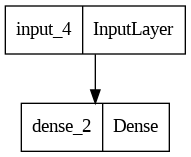

In [11]:
# Plot the model
plot_model(model, to_file='model.png')

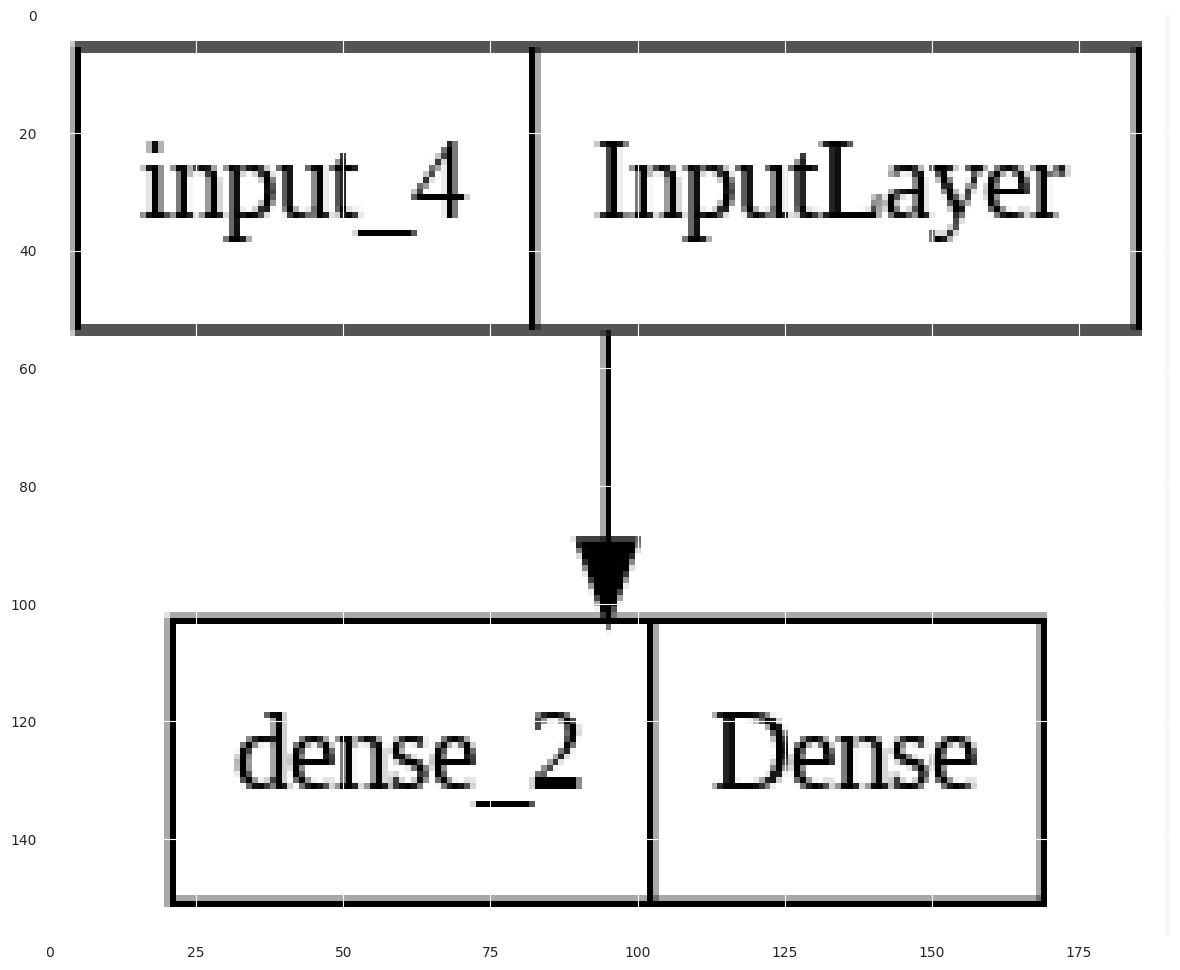

In [12]:
# Display the image
data = plt.imread('model.png')
plt.imshow(data)
plt.show()

***Il s'avère que les réseaux de neurones ne sont pas vraiment des boîtes noires après tout !***

####**1. Ajuster et évaluer un modèle**

+ ***Dans cette leçon, vous prendrez le modèle que vous avez compilé dans la leçon 2 et l'adapterez aux données du basketball universitaire.***

####**2. Données de basket-ball**

+ ***Votre objectif est de prédire quelle équipe remportera un match de tournoi. Les seules données avec lesquelles vous devez travailler sont les "graines de départ" de l'équipe, qui sont attribuées par les organisateurs du tournoi, et sont une évaluation de la qualité de l'équipe. Une graine de 1 est une très bonne équipe, et une graine de 16 est une très mauvaise équipe. Au cours des plus de 30 ans d'histoire du tournoi, une tête de série 16 a battu une tête de série 1 exactement une fois. C'était en 2018, une année très excitante pour les fans de basket-ball universitaire.***

####**3. Données de basket-ball**

+ ***Votre contribution sera la différence de tête de série entre les deux équipes. Par exemple, si une graine 7 joue une graine 10, leur différence de graines est de 7 moins 10, ou -3. Si une tête de série 11 joue une tête de série 7, leur différence de tête de série est de 11 moins 7, soit 4.***

####**4. Données de basket-ball**

+ ***Votre sortie sera la différence de score entre les deux équipes. Par exemple, si l'équipe 1 marque 41 points et l'équipe 2 marque 50 points, la différence de score est de 41 moins 50, ou moins 9. D'autre part, si l'équipe 1 marque 61 points et l'équipe 2 marque 55 points, la différence de score est 61 moins 55 ou plus 6.***

####**5. Données de basket-ball**

+ ***Par conséquent, votre modèle a une entrée et une sortie. C'est exactement le modèle que vous avez créé dans les leçons 1 et 2 de ce chapitre ! Vous utiliserez la différence de graines comme entrée. Notez que vous avez à la fois une graine 16 jouant une graine 1 et une graine 1 jouant une graine 16 dans vos données, vous aurez donc des différences de graines allant de moins 15 à plus 15.***

####**6. Données de basket-ball**

+ ***Une différence de tête de série positive de 15 signifie que l'équipe 1 a une tête de série de 16 et joue contre une équipe de tête de série de 1. Cela signifie que l'équipe 1 est susceptible (mais pas certaine) de perdre. Une différence de tête de série de moins 15 signifie que l'équipe 1 a une tête de série de 1 et joue contre une équipe de tête de série de 16. Cela signifie que l'équipe 1 est susceptible (mais pas certaine) de gagner. Ainsi, une différence de graine positive est généralement prédictive d'une différence de score négative, et une différence de graine négative est généralement prédictive d'une différence de score positive.***

####**7. Données de basket-ball**

+ ***Notre variable cible est la différence de score du jeu et varie d'environ moins 50 à plus 50. Cela signifie que vous avez des jeux où l'équipe 1 a perdu de 50 points et des jeux où elle a gagné de 50 points.***

####**8. Données de basket-ball**

+ ***Notez que les ensembles de données de la saison régulière et du tournoi ont 2 lignes par match, où la deuxième ligne a les signes opposés de la première ligne. En d'autres termes, pour un jeu donné où la première équipe a gagné, il y a aussi une ligne dans l'ensemble de données où team_1 et team_2 sont permutées, et la première équipe a perdu.***

####**9. Construire le modèle**

+ ***Voici le modèle des leçons 1 et 2, défini dans un seul morceau de code. Il s'agit d'un modèle de régression Keras très basique, avec une entrée et une sortie. Vous pouvez utiliser ce modèle pour tout problème de régression avec un seul prédicteur et un seul résultat.***

####**10. Monter le modèle**

+ ***Pour ajuster le modèle, chargez l'ensemble de données du tournoi de basketball à partir d'un fichier CSV à l'aide de pandas, puis appelez `model.fit()`. Utilisez la colonne `seed_diff` du jeu de données comme entrée et la colonne `score_diff` du jeu de données comme sortie. La méthode d'ajustement a quelques arguments supplémentaires, qui peuvent être utiles : La taille du lot définit le nombre de lignes de données utilisées pour chaque étape de descente de gradient stochastique. Dans ce cas, vous vous entraînerez sur 64 rangées à la fois. La division de validation indique à Keras d'utiliser un ensemble d'exclusion et de renvoyer des métriques sur la précision à l'aide de ces données. Cela peut être utile pour valider que vos modèles fonctionneront bien sur de nouvelles données. Lorsque verbose est défini sur True, Keras imprime un journal pendant la formation. Cela peut être utile pour le débogage, mais généralement, je le règle sur False une fois que j'aime le fonctionnement du modèle.***

####**11. Évaluer le modèle**

+ ***Une fois que vous avez ajusté un modèle, il est utile de l'évaluer sur de nouvelles données. Même si vous utilisez un ensemble de validation pendant la formation, vous souhaitez souvent effectuer une deuxième vérification, à l'aide d'un nouvel ensemble de données, pour vous assurer que le modèle prédit comme prévu. Pour ce faire, vous pouvez utiliser la méthode `évalue()` du modèle et lui transmettre les variables $X$ et les variables $Y$ des nouvelles données. Lorsque vous faites cela, Keras signalera les métriques d'erreur sur les nouvelles données.***

####**12. Entraînons-nous !**

+ ***Il est temps pour vous d'adapter le modèle !***

####**Ajuster le modèle aux données de basket-ball du tournoi**

+ ***Maintenant que le modèle est compilé, vous êtes prêt à l'adapter à certaines données !***

+ ***Dans cet exercice, vous allez utiliser un ensemble de données de scores de matchs de tournois de basket-ball universitaire américain. Chaque ligne de l'ensemble de données contient les identifiants d'équipe : team_1et team_2, sous forme d'entiers. Il a également la différence de tête de série entre les équipes (les têtes de série sont attribuées par le comité du tournoi et représentent un classement de la force des équipes) et la différence de score du jeu (par exemple, si gagne par 5 points, la différence de score est team_1) 5.***

+ ***Pour ajuster le modèle, vous fournissez une matrice de variables $X$ (dans ce cas une colonne : la différence de départ) et une matrice de variables $Y$ (dans ce cas une colonne : la différence de score).***

+ *Le DataFrame games_tourney ainsi que l'objet model compilé sont disponibles dans votre espace de travail.*

####**Instructions**

+ Ajustez le modèle avec seed_diff comme variable d'entrée et score_diff comme variable de sortie.
+ Utilisez 1 époque, une taille de lot de 128 et une répartition de validation de 10 %.



In [13]:
games_tourney = pd.read_csv('games_tourney.csv')
games_tourney.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0


In [14]:
from sklearn.model_selection import train_test_split

games_tourney_train, games_tourney_test = train_test_split(games_tourney, test_size=0.3)

In [15]:
input_tensor = Input(shape=(1, ))
output_tensor = Dense(1)(input_tensor)

model = Model(input_tensor, output_tensor)
model.compile(optimizer='adam', loss='mean_absolute_error')

In [16]:
# Now fit the model
model.fit(games_tourney_train['seed_diff'], games_tourney_train['score_diff'],
          epochs=1,
          batch_size=128,
          validation_split=0.1,
          verbose=True)

21/21 [==============================] - 2s 34ms/step - loss: 9.2161 - val_loss: 8.6890


***Maintenant, votre modèle a appris quelque chose sur les données de basket !***

####**Évaluer le modèle sur un jeu de test**
+ ***Après avoir ajusté le modèle, vous pouvez l'évaluer sur de nouvelles données. Vous allez donner au modèle une nouvelle Xmatrice (également appelée données de test), lui permettre de faire des prédictions, puis la comparer à la yvariable connue (également appelée données cibles).***

+ ***Dans ce cas, vous utiliserez les données du tournoi d'après-saison pour évaluer votre modèle. Les matchs du tournoi se déroulent après les matchs de la saison régulière que vous avez utilisés pour entraîner notre modèle et constituent donc une bonne évaluation de la performance de votre modèle hors échantillon.***

+ *Le DataFrame games_tourney_test ainsi que l'objet model ajusté sont disponibles dans votre espace de travail.*

####**Instructions**

+ Attribuez les données de test (colonne seed_diff) à X_test.
+ Attribuez les données cibles (colonne score_diff) à y_test.
+ Évaluez le modèle sur X_test et y_test.

In [17]:
# Load the X variable from the test data
X_test = games_tourney_test['seed_diff']

# Load the y variable from the test data
y_test = games_tourney_test['score_diff']

# Evaluate the model on the test data
print(model.evaluate(X_test, y_test, verbose=False))

9.357091903686523


***On dirait que votre modèle fait de très bonnes prédictions !***

####**1. Imbrications de catégories**

+ ***Dans le chapitre 1, notre ensemble de données de jeux de tournoi ne contenait qu'environ 4 000 lignes. Cependant, nous avons un ensemble de données beaucoup plus important avec plus de 300 000 matchs de saison régulière. Voyons ce que nous pouvons apprendre d'un échantillon de données beaucoup plus large ! Dans les 2 jeux de données de basket-ball que vous utiliserez dans ce cours, il y a un peu moins de 11 000 équipes. Chaque équipe est codée sous la forme d'un nombre entier commençant par 1 et se terminant par 10 887. Dans cette leçon, vous apprendrez à utiliser ces ID d'équipe comme entrées dans un modèle qui apprend la force de chaque équipe.***

####**2. Imbrications de catégories**

+ ***Les intégrations catégorielles sont un type de couche avancé, uniquement disponible dans les bibliothèques d'apprentissage en profondeur. Ils sont extrêmement utiles pour traiter des données catégorielles à cardinalité élevée. Dans cet ensemble de données, la variable d'ID d'équipe a une cardinalité élevée. L'incorporation de calques est également très utile pour traiter les données textuelles, comme dans les modèles Word2vec, mais cela dépasse le cadre de ce cours. Pour modéliser ces équipes dans les données de basket-ball, vous utiliserez un modèle très simple qui apprend une note de "force" pour chaque équipe et utilise ces notes pour faire des prédictions. Pour mapper les identifiants d'équipe entiers à une note décimale, nous utiliserons une couche d'intégration.***

####**3. Entrées**

+ ***Pour commencer avec les intégrations de catégories, vous aurez besoin d'une couche d'entrée. Dans ce cas, votre saisie est un nombre unique, compris entre 1 et 10 887, qui représente l'identifiant unique de chaque équipe. Notez que cet ensemble de données couvre environ 30 ans de données et compte environ 400 écoles uniques, ce qui nous donne près de 12 000 identifiants. Nous n'avons qu'environ 11 000 de ces combinaisons année/équipe, car toutes les écoles n'ont pas une équipe de basket-ball chaque année.***

####**4. Couche d'intégration**

+ ***Pour créer une couche d'intégration, utilisez la fonction `Embedding() de tensorflow.keras.layers`. Étant donné que vous avez 10 887 équipes uniques dans l'ensemble de données, vous définissez la dimension d'entrée de la couche d'intégration sur 10 887. Comme vous représentez chaque équipe sous la forme d'un entier unique, utilisez une longueur d'entrée de 1. Vous souhaitez produire une seule cote de force d'équipe, utilisez donc une dimension de sortie de 1. Enfin, nommez votre couche, afin de pouvoir la trouver facilement lorsque vous recherchez au résumé du modèle ou au tracé. Pour utiliser la couche d'intégration, connectez-la au tenseur produit par la couche d'entrée. Cela produira un tenseur de sortie intégré.***

####**5. Aplatir**

+ ***L'intégration de couches augmente la dimensionnalité de vos données. Le CSV d'entrée a deux dimensions (lignes et colonnes), mais l'incorporation de couches ajoute une troisième dimension. Cette troisième dimension peut être utile lorsqu'il s'agit d'images et de texte, elle n'est donc pas aussi pertinente pour ce cours. Par conséquent, nous utilisons la couche d'aplatissement pour aplatir les plongements de 3D à 2D. La couche d'aplatissement est également la couche de sortie pour le processus d'incorporation. Les couches aplaties sont une couche avancée pour les modèles d'apprentissage en profondeur et peuvent être utilisées pour transformer des données de plusieurs dimensions en deux dimensions. Ils sont utiles pour traiter les données de séries chronologiques, les données textuelles et les images.***

####**6. Rassembler le tout**

+ ***Vous pouvez maintenant envelopper votre couche d'intégration dans un modèle. Cela vous permettra de réutiliser le modèle pour plusieurs entrées dans le jeu de données. Pour ce faire, définissez une couche d'entrée, puis une couche d'intégration, puis une couche d'aplatissement pour la sortie. Enfin, enveloppez le tenseur d'entrée et aplatissez le tenseur dans un modèle. Ce modèle peut être traité exactement comme un calque et réutilisé à l'intérieur d'un autre modèle.***

####**7. Entraînons-nous !**

+ ***Maintenant c'est ton tour!***

###**EXERCICES**

####**Définir la recherche d'équipe**

+ ***Les couches partagées permettent à un modèle d'utiliser la même matrice de poids pour plusieurs étapes. Dans cet exercice, vous allez créer une couche "force de l'équipe" qui représente chaque équipe par un nombre unique. Vous utiliserez ce numéro pour les deux équipes dans le modèle. Le modèle apprendra un numéro pour chaque équipe qui fonctionne bien à la fois lorsque l'équipe est team_1 et lorsque l'équipe est team_2 dans les données d'entrée.***

+ *Le DataFrame games_season est disponible dans votre espace de travail.*

####**Instructions**

+ Comptez le nombre d'équipes uniques.
+ Créez une couche d'intégration qui associe chaque ID d'équipe à un numéro unique représentant la force de cette équipe.
+ La forme de sortie doit être à 1 dimension (car nous voulons représenter les équipes par un seul nombre).
+ La longueur d'entrée doit être d'une dimension (chaque équipe étant représentée par exactement un identifiant).

In [18]:
games_season = pd.read_csv('games_season.csv')
games_season.head()

,season,team_1,team_2,home,score_diff,score_1,score_2,won
0,1985,3745,6664,0,17,81,64,1
1,1985,126,7493,1,7,77,70,1
2,1985,288,3593,1,7,63,56,1
3,1985,1846,9881,1,16,70,54,1
4,1985,2675,10298,1,12,86,74,1


In [19]:
# Imports
from keras.layers import Embedding
from numpy import unique

# Count the unique number of teams
n_teams = unique(games_season[['team_1', 'team_2']]).shape[0]

In [20]:
# Create an embedding layer
team_lookup = Embedding(input_dim=n_teams,
                        output_dim=1,
                        input_length=1,
                        name='Team-Strength')

***La couche d'intégration ressemble beaucoup à un dictionnaire, mais votre modèle apprend les valeurs de chaque clé.***


####**Définir le modèle d'équipe**

+ ***La recherche de force d'équipe comporte trois composants : une entrée, une couche d'intégration et une couche d'aplatissement qui crée la sortie.***

+ ***Si vous encapsulez ces trois couches dans un modèle avec une entrée et une sortie, vous pouvez réutiliser cette pile de trois couches à plusieurs endroits.***

+ *Notez à nouveau que les poids des trois couches seront partagés partout où nous les utilisons.*

####**Instructions**

+ Créez une couche d'entrée 1D pour l'ID d'équipe (qui sera un nombre entier). Assurez-vous de définir la forme d'entrée correcte !
+ Transmettez cette entrée à la couche de recherche de force d'équipe que vous avez créée précédemment.
+ Aplatir la sortie de la recherche de force d'équipe.
+ Créez un modèle qui utilise l'entrée 1D comme entrée et la force de l'équipe aplatie comme sortie.

In [21]:
# Imports
from keras.layers import Input, Embedding, Flatten
from keras.models import Model

# Create an input layer for the team ID
teamid_in = Input(shape=(1,))

# Lookup the input in the team strength embedding layer
strength_lookup = team_lookup(teamid_in)

# Flatten the output
strength_lookup_flat = Flatten()(strength_lookup)

# Combine the operations into a single, re-usable model
team_strength_model = Model(teamid_in, strength_lookup_flat, name='Team-Strength-Model')

In [22]:
team_strength_model.summary()

Model: "Team-Strength-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 Team-Strength (Embedding)   (None, 1, 1)              10888     
                                                                 
 flatten (Flatten)           (None, 1)                 0         
                                                                 
Total params: 10,888
Trainable params: 10,888
Non-trainable params: 0
_________________________________________________________________


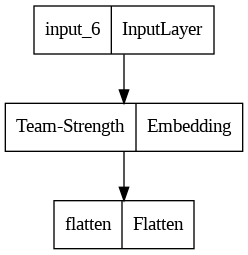

In [23]:
plot_model(team_strength_model)

***Le modèle sera réutilisable, vous pourrez donc l'utiliser à deux endroits dans votre modèle final.***

####**1. Couches partagées**

+ ***Dans ce chapitre, vous allez créer un modèle avec deux entrées : une pour chaque équipe du jeu de données de basket-ball. Cependant, vous souhaitez que ces deux équipes utilisent chacune la même couche d'intégration que vous avez définie dans la leçon précédente. Pour y parvenir, il faut une couche partagée.***

####**2. Couches partagées**

+ ***Les couches partagées sont un concept avancé d'apprentissage en profondeur et ne sont possibles qu'avec l'API fonctionnelle Keras. Ils vous permettent de définir une opération, puis d'appliquer exactement la même opération (avec exactement les mêmes poids) sur différentes entrées. Dans ce modèle, nous partagerons la note d'équipe pour les deux entrées. La cote apprise sera la même, qu'elle s'applique à l'équipe 1 ou à l'équipe 2.***

####**3. Couches partagées**

+ ***Pour créer une couche partagée, vous devez d'abord créer deux entrées (ou plus), dont chacune sera transmise à la couche partagée. Dans ce cas, vous utiliserez deux entrées.***

####**4. Couches partagées**

+ ***Une fois que vous avez deux entrées, la magie de l'API fonctionnelle de Keras devient apparente. Rappelez-vous du chapitre 1 que la fonction `Dense()` renvoie une fonction en sortie. Cette fonction, que `Dense()` génère, prend un tenseur en entrée et produit un tenseur en sortie. Vous pouvez utiliser la même fonction `Dense()` pour créer un calque partagé ! Cela est aussi simple que d'appeler la fonction deux fois, avec un tenseur d'entrée différent à chaque fois.***

####**5. Partager plusieurs calques en tant que modèle**

+ ***Rappelez-vous le modèle d'intégration de catégories que nous avons créé dans la leçon précédente. Ce modèle intègre d'abord une entrée, puis l'aplatit. Vous pouvez également partager des modèles, pas seulement des calques. C'est vraiment cool et fait partie de ce qui rend l'API fonctionnelle si utile. Vous pouvez définir des composants modulaires de modèles, puis les réutiliser. Nous définissons une couche d'intégration et l'enveloppons dans un modèle. Nous définissons ensuite 2 tenseurs d'entrée, et passons chacun au même modèle, produisant 2 tenseurs de sortie. Cela utilisera le même modèle, avec les mêmes couches et les mêmes poids, pour mapper chaque entrée à sa sortie correspondante.***

####**6. Partager plusieurs calques en tant que modèle**

+ ***En d'autres termes, vous pouvez prendre une séquence arbitraire de couches de keras et les encapsuler dans un modèle. Une fois que vous avez un modèle, vous pouvez le réutiliser pour partager cette séquence d'étapes pour différentes couches d'entrée.***

####**7. Entraînons-nous !**

+ ***Vous allez maintenant créer une couche partagée à l'aide du modèle d'intégration de la force de l'équipe que vous avez créé dans la leçon précédente.***

###**EXERCICES**

####**Définir deux entrées**

+ ***Dans cet exercice, vous allez définir deux couches d'entrée pour les deux équipes de votre modèle. Cela vous permet de spécifier plus tard dans le modèle comment les données de chaque équipe seront utilisées différemment.***

####**Instructions**

+ Créez une couche d'entrée à utiliser pour l'équipe 1.
+ Rappelez-vous que notre dimension d'entrée est 1.
+ Nommez l'entrée "Team-1-In" afin de pouvoir la distinguer plus tard de l'équipe 2.
+ Créez une couche d'entrée à utiliser pour l'équipe 2, nommée "Team-2-In".

In [25]:
# Load the input layer from keras.layers
from keras.layers import Input

# Input layer for team 1
team_in_1 = Input(shape=(1,),name="Team-1-In")
print(team_in_1)

# Separate input layer for team 2
team_in_2 = Input(shape=(1,),name="Team-2-In")
print(team_in_2)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='Team-1-In'), name='Team-1-In', description="created by layer 'Team-1-In'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='Team-2-In'), name='Team-2-In', description="created by layer 'Team-2-In'")


***Ces deux entrées seront utilisées plus tard pour la couche partagée.***


####**Rechercher les deux entrées dans le même modèle**

+ ***Maintenant que vous disposez d'un modèle de force d'équipe et d'une couche d'entrée pour chaque équipe, vous pouvez rechercher les entrées de l'équipe dans le modèle de force d'équipe partagé. Les deux entrées partageront les mêmes poids.***

+ ***Dans cet ensemble de données, vous avez 10 888 équipes uniques. Vous voulez apprendre une cote de force pour chaque équipe, de sorte que si une paire d'équipes s'affronte, vous pouvez prédire le score, même si ces deux équipes n'ont jamais joué auparavant. De plus, vous voulez que la cote de force soit la même, que l'équipe soit l'équipe à domicile ou l'équipe à l'extérieur.***

+ *Pour ce faire, vous utilisez une couche partagée, définie par le modèle réutilisable ( team_strength_model()) que vous avez créé dans l'exercice 3 et les deux couches d'entrée ( team_in_1et team_in_2) de l'exercice précédent, qui sont toutes disponibles dans votre espace de travail.*

####**Instructions**

+ Recherchez le premier ID d'équipe dans le modèle de force d'équipe.
+ Recherchez le deuxième ID d'équipe dans le modèle de force d'équipe.

In [26]:
# Lookup team 1 in the team strength model
team_1_strength = team_strength_model(team_in_1)
print(team_1_strength)

# Lookup team 2 in the team strength model
team_2_strength = team_strength_model(team_in_2)
print(team_2_strength)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='Team-Strength-Model/flatten/Reshape:0', description="created by layer 'Team-Strength-Model'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='Team-Strength-Model/flatten/Reshape:0', description="created by layer 'Team-Strength-Model'")


***Maintenant, votre modèle sait à quel point chaque équipe est forte.***

####**1. Fusionner les calques**

+ ***Maintenant que vous avez plusieurs entrées et une couche partagée, vous devez combiner vos entrées en une seule couche que vous pouvez utiliser pour prédire une seule sortie. Cela nécessite une couche de fusion. Les couches de fusion vous permettent de définir des topologies de réseau avancées et non séquentielles. Cela peut vous donner beaucoup de flexibilité pour concevoir des réseaux de manière créative afin de résoudre des problèmes spécifiques.***

####**2. Fusionner les calques**

+ ***Il existe de nombreux types de calques de fusion disponibles dans Keras. Les calques d'addition, de soustraction et de multiplication effectuent des opérations arithmétiques simples par élément sur les calques d'entrée et exigent qu'ils aient la même forme. Par exemple, si nous voulions multiplier les notes de force de notre équipe, nous pourrions utiliser une couche Multiplier. Concaténer les couches ajoute simplement les 2 couches ensemble, similaire à la fonction `hstack()` de numpy. Contrairement aux autres couches de fusion, la couche Concaténer peut fonctionner sur des couches avec différents nombres de colonnes.***

####**3. Fusionner les calques**

+ ***Construisons un modèle Keras simple qui prend deux nombres et les additionne. Pour ce faire, définissez deux couches d'entrée et utilisez la couche Ajouter pour les additionner.***

####**4. Fusionner les calques**

+ ***Si vous souhaitez ajouter plusieurs entrées, vous pouvez transmettre une liste avec plus de deux éléments à une couche Ajouter. Notez que toutes les entrées doivent avoir la même forme, afin qu'elles puissent être combinées élément par élément. Les calques Soustraire et Multiplier fonctionnent de la même manière.***

####**5. Créez le modèle**

+ ***Vous pouvez maintenant encapsuler la sortie de votre couche Ajouter dans un modèle, ce qui vous permettra ensuite de l'adapter aux données. Notez que le modèle prend une liste d'entrées car il a plus d'une entrée.***

####**6. Compiler le modèle**

+ ***Comme pour les autres modèles Keras, vous devez le compiler avant de l'adapter. Utilisez l'optimiseur "adam" et l'erreur absolue moyenne comme fonction de perte.***

####**7. Entraînons-nous !**

+ ***Vous pouvez maintenant vous entraîner à utiliser des calques de fusion.***


###**EXERCICES**

####**Couche de sortie utilisant une couche partagée**
+ ***Maintenant que vous avez recherché la "forte" de chaque équipe, soustrayez les forces de l'équipe pour déterminer quelle équipe devrait gagner la partie.***

+ ***C'est un peu comme les graines que le comité du tournoi utilise, qui sont aussi une mesure de la force de l'équipe. Mais plutôt que d'utiliser les différences de graines pour prédire les différences de score, vous utiliserez la différence de votre propre modèle de force d'équipe pour prédire les différences de score.***

+ *La couche de soustraction combinera les poids des deux couches en les soustrayant.*

####**Instructions**

+ Importez le calque Subtract depuis keras.layers.
+ Combinez les recherches de force de deux équipes que vous avez effectuées précédemment.

In [27]:
# Import the Subtract layer from keras
from keras.layers import Subtract

# Create a subtract layer using the inputs from the previous exercise
score_diff = Subtract()([team_1_strength, team_2_strength])

In [28]:
print(score_diff)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='subtract/sub:0', description="created by layer 'subtract'")


***Cette configuration soustrait les cotes de force de l'équipe pour déterminer un gagnant.***

####**Modèle utilisant deux entrées et une sortie**

+ ***Maintenant que vous avez vos deux entrées (identifiant d'équipe 1 et identifiant d'équipe 2) et la sortie (différence de score), vous pouvez les regrouper dans un modèle afin de pouvoir l'utiliser ultérieurement pour l'adapter aux données et l'évaluer sur de nouvelles données.***

+ ***Votre modèle ressemblera au schéma suivant :***

<img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_6554/datasets/basketball_model_2.png"/>

####**Instructions**

+ Définissez un modèle avec les deux équipes comme entrées et utilisez la différence de score comme sortie.
+ Compilez le modèle avec l'optimiseur 'adam' et la perte'mean_absolute_error'.

In [29]:
# Imports
from keras.layers import Subtract
from keras.models import Model

# Subtraction layer from previous exercise
score_diff = Subtract()([team_1_strength, team_2_strength])

# Create the model
model = Model([team_in_1,team_in_2], score_diff)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [30]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Team-1-In (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 Team-2-In (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 Team-Strength-Model (Functiona  (None, 1)           10888       ['Team-1-In[0][0]',              
 l)                                                               'Team-2-In[0][0]']              
                                                                                                  
 subtract_1 (Subtract)          (None, 1)            0           ['Team-Strength-Model[0][0]

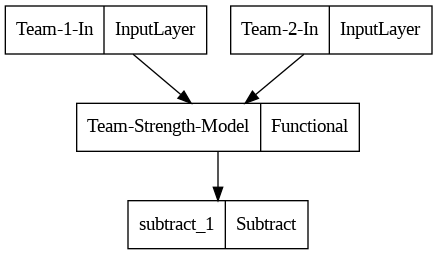

In [31]:
plot_model(model, to_file='embedding_shared_merge_model.png')

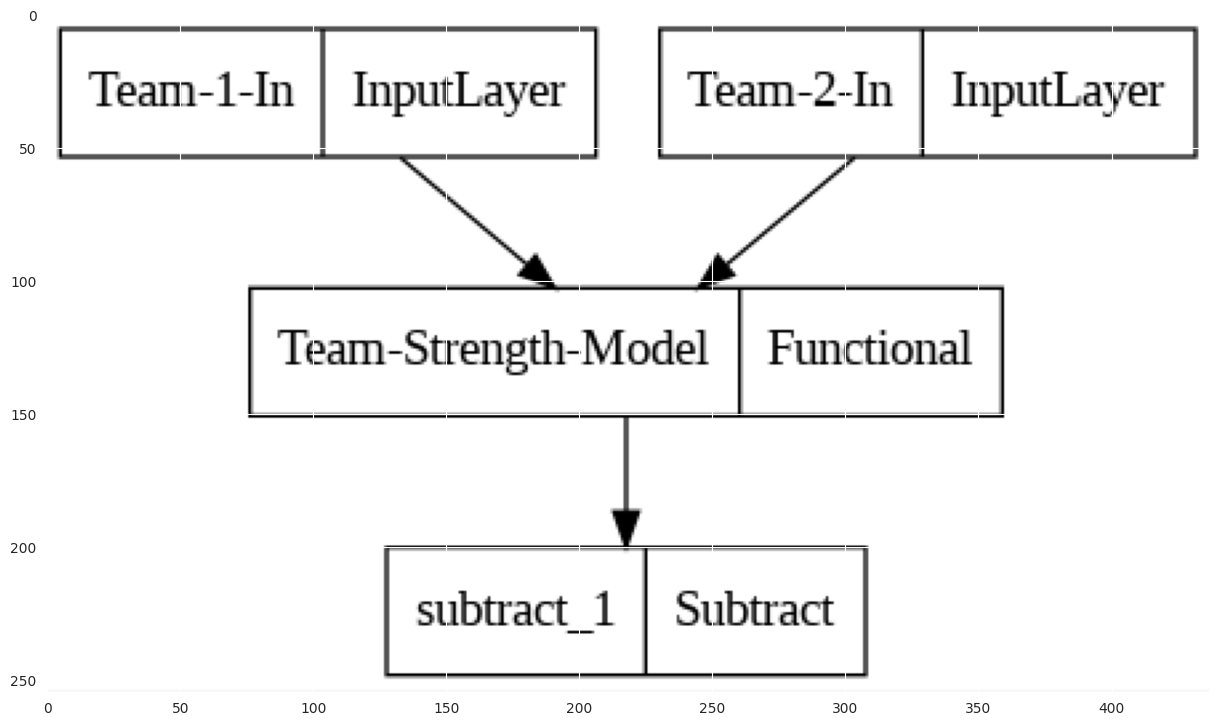

In [32]:
data = plt.imread('embedding_shared_merge_model.png')
plt.imshow(data);

***Votre modèle est maintenant finalisé et prêt à s'adapter aux données.***

####**1. Ajustement et prédiction avec plusieurs entrées**

+ ***Les modèles Keras avec plusieurs entrées fonctionnent comme les modèles Keras avec une seule entrée. Ils utilisent les mêmes méthodes d'ajustement, d'évaluation et de prédiction. La seule différence est que toutes ces méthodes prennent des listes d'entrées, plutôt qu'une seule entrée.***

####**2. Ajustement avec plusieurs entrées**

+ ***Pour ajuster un modèle avec plusieurs entrées, fournissez au modèle une liste d'entrées. Dans ce cas, puisque vous avez deux entrées, le modèle doit avoir une liste d'entrées de longueur 2. Vous souhaitez utiliser ce modèle pour prédire une cible unique, de sorte que la cible de formation est toujours un objet unique. Bien que ce réseau soit très simple, le concept qu'il illustre est assez avancé. Plus tard dans le cours, vous traiterez différentes entrées du réseau de différentes manières. En d'autres termes, plusieurs entrées vous permettent d'effectuer un prétraitement des données dans le cadre du modèle que vous apprenez !***

####**3. Prédire avec plusieurs entrées**

+ ***Pour faire des prédictions à partir d'un modèle avec deux entrées, vous devez également fournir deux entrées à la méthode `predict()` du modèle, toujours sous forme de liste. Dans ce cas, j'ai défini un modèle qui additionne des nombres. Donc, pour ajouter 1 et 2, convertissez d'abord 1 et 2 en tableaux numpy 2D. Passez ensuite 1 comme première entrée et 2 comme deuxième entrée. Le modèle produit 3. Notez que le type de données de la sortie est float32. Vous pouvez également ajouter d'autres nombres avec ce modèle simple, par exemple 42 et 119. Qui totalisent 161.***

####**4. Évaluer avec plusieurs entrées**

+ ***Pour évaluer un modèle avec plusieurs entrées, donnez-lui simplement une liste d'entrées, ainsi qu'une seule sortie, et le modèle renverra sa perte sur les nouvelles données. Dans ce cas, puisque j'ai codé en dur le modèle pour ajouter les 2 entrées, l'erreur d'évaluation sur les données de test est nulle.***

####**5. Entraînons-nous !**

+ ***Maintenant que vous savez comment transmettre des listes à des modèles à entrées multiples, adaptez votre modèle de basket-ball à entrées multiples à certaines données.***

###**EXERCICES**
####Ajuster le modèle aux données d'entraînement de la saison régulière
+ ***Maintenant que vous avez défini un modèle complet de force d'équipe, vous pouvez l'adapter aux données de basket-ball ! Puisque votre modèle a maintenant deux entrées, vous devez transmettre les données d'entrée sous forme de liste.***

####**Instructions**

+ Affectez les colonnes 'team_1'et 'team_2' de games_season à input_1 et input_2, respectivement.
+ Utilisez la colonne 'score_diff' de games_season comme cible.
+ Ajustez le modèle en utilisant 1 époque, une taille de lot de 2048 et une répartition de validation de 10 %.

In [33]:
# Get the team_1 column from the regular season data
input_1 = games_season['team_1']

# Get the team_2 column from the regular season data
input_2 = games_season['team_2']

# Fit the model to input 1 and 2, using score diff as a target
model.fit([input_1, input_2],
          games_season['score_diff'],
          epochs=1,
          batch_size=2048,
          validation_split=0.1,
          verbose=True)

138/138 [==============================] - 1s 3ms/step - loss: 12.1204 - val_loss: 11.8389


***Maintenant, notre modèle a appris une cote de force pour chaque équipe.***

####**Évaluer le modèle sur les données de test du tournoi**

+ ***Le modèle que vous avez ajusté aux données de la saison régulière (model) dans l'exercice précédent et le jeu de données du tournoi (games_tourney) sont disponibles dans votre espace de travail.***

+ ***Dans cet exercice, vous allez évaluer le modèle sur ce nouveau jeu de données. Cette évaluation vous indiquera dans quelle mesure vous pouvez prédire les matchs du tournoi, sur la base d'un modèle entraîné avec les données de la saison régulière. C'est intéressant car de nombreuses équipes s'affrontent dans le tournoi qui n'a pas joué en saison régulière, c'est donc une très bonne vérification que votre modèle n'est pas surajusté.***

####**Instructions**

+ Affectez les colonnes 'team_1'et 'team_2' de games_tourney à input_1 et input_2, respectivement.
+ Évaluez le modèle.

In [34]:
games_tourney = pd.read_csv('games_tourney.csv')
games_tourney.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0


In [35]:
# Get team_1 from the tournament data
input_1 = games_tourney['team_1']

# Get team_2 from the tournament data
input_2 = games_tourney['team_2']

# Evaluate the model using these inputs
print(model.evaluate([input_1, input_2], games_tourney['score_diff'], verbose=False))

11.681578636169434


***Bon travail! Il est temps de passer aux modèles à plus de deux entrées.***

####**1. Modèles à trois entrées**

+ ***Dans ce chapitre, vous allez étendre votre modèle à deux entrées à trois entrées, et au-delà. Cela démontre la puissance de l'API fonctionnelle de Keras. Une fois que vous avez appris à travailler avec deux réseaux d'entrée, il est trivial d'étendre ces connaissances à 3 réseaux d'entrée ou plus.***

####**2. Modèle simple à 3 entrées**

+ ***Faire un modèle Keras avec 3 entrées revient presque exactement à faire un modèle Keras avec deux entrées. Pour commencer, créez trois couches d'entrée différentes. Dans ce cas, vous utiliserez un calque Concaténer pour combiner les entrées, mais rappelez-vous des chapitres précédents que vous pouvez également utiliser un calque Ajouter ou Soustraire. Dans la couche de concaténation, passez simplement une liste de trois entrées, au lieu de deux. Enfin, ajoutez une couche Dense pour réduire les trois entrées à une seule sortie.***

####**3. Modèle simple à 3 entrées**

+ ***Lors de la création d'un modèle avec trois entrées, passez simplement une liste avec trois couches d'entrée et une couche de sortie.***

####**4. Couches partagées avec 3 entrées**

+ ***Dans les exercices de ce chapitre, vous vous entraînerez également à utiliser une couche partagée dans un modèle avec plus de deux entrées. Par exemple, vous pouvez transmettre les deux premières entrées à une couche partagée, puis concaténer le résultat de cette couche partagée avec la troisième entrée. En d'autres termes, vous pouvez définir un modèle Keras comme vous le souhaitez ! Cela vous donne beaucoup de flexibilité pour personnaliser le modèle en fonction du problème que vous souhaitez résoudre.***

####**5. Couches partagées avec 3 entrées**

+ ***Comme précédemment, nous transmettons les trois entrées d'origine à la fonction `Model()` lors de la création d'un modèle.***

####**6. Montage d'un modèle à 3 entrées**

+ ***Comme pour tout modèle Keras, vous devez le compiler avant de l'ajuster. Lors de la compilation, vous spécifiez une fonction de perte et un optimiseur. Lors de l'ajustement d'un modèle à trois entrées, fournissez une liste avec trois colonnes d'entrée, plutôt que deux. Étant donné que ce modèle n'a qu'une seule sortie, utilisez une seule sortie dans votre modèle. De même, lors de l'évaluation de votre modèle sur de nouvelles données, à l'aide de `model.evaluate()`, transmettez trois entrées dans une liste et une sortie.***

####**7. Pratiquons**

+ ***Il est temps pour vous d'adapter des modèles à trois entrées. Une fois que vous avez compris à quel point il est facile d'étendre des modèles à deux entrées à trois entrées, vous devriez également pouvoir créer des modèles à quatre entrées, ou cinq, voire plus !***

###**EXERCICES**

####**Créez une couche d'entrée pour la maison ou l'extérieur**

+ ***Vous allez maintenant apporter une amélioration au modèle que vous avez utilisé dans le chapitre précédent pour les matchs de la saison régulière. Vous savez qu'il existe un avantage bien documenté pour l'équipe à domicile dans le basket-ball, vous allez donc ajouter une nouvelle entrée à votre modèle pour capturer cet effet.***

+ ***Ce modèle aura trois entrées : team_id_1, team_id_2 et home. Les identifiants d'équipe seront des nombres entiers que vous recherchez dans votre modèle de force d'équipe du chapitre précédent, et la maison sera une variable binaire, 1 si team_1 joue à domicile, 0 si ce n'est pas le cas.***

+ ***Le team_strength_model que vous avez utilisé dans le chapitre précédent a été chargé dans votre espace de travail. Après l'avoir appliqué à chaque entrée, utilisez une couche Concaténer pour joindre les deux points forts de l'équipe et avec la variable domicile vs extérieur, et transmettez le résultat à une couche Dense.***

####**Instructions**

+ Créez trois couches d'entrées de forme 1, une pour l'équipe 1, l'équipe 2 et la maison contre l'extérieur.
+ Recherchez les entrées de l'équipe dans team_strength_model().
+ Concaténez les points forts de l'équipe avec l'entrée de la maison et passez à une couche Dense.

In [36]:
games_season = pd.read_csv('games_season.csv')
games_season.head()

,season,team_1,team_2,home,score_diff,score_1,score_2,won
0,1985,3745,6664,0,17,81,64,1
1,1985,126,7493,1,7,77,70,1
2,1985,288,3593,1,7,63,56,1
3,1985,1846,9881,1,16,70,54,1
4,1985,2675,10298,1,12,86,74,1


In [37]:
games_tourney = pd.read_csv('games_tourney.csv')
games_tourney.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0


In [38]:
from keras.layers import Embedding, Input, Flatten
from keras.models import Model

# Count the unique number of teams
n_teams = np.unique(games_season['team_1']).shape[0]

# Create an embedding layer
team_lookup = Embedding(input_dim=n_teams,
                        output_dim=1,
                        input_length=1,
                        name='Team-Strength')

# Create an input layer for the team ID
teamid_in = Input(shape=(1, ))

# Lookup the input in the team strength embedding layer
strength_lookup = team_lookup(teamid_in)

# Flatten the output
strength_lookup_flat = Flatten()(strength_lookup)

# Combine the operations into a single, re-usable model
team_strength_model = Model(teamid_in, strength_lookup_flat, name='Team-Strength-Model')

team_strength_model.summary()

Model: "Team-Strength-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 Team-Strength (Embedding)   (None, 1, 1)              10888     
                                                                 
 flatten_1 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 10,888
Trainable params: 10,888
Non-trainable params: 0
_________________________________________________________________


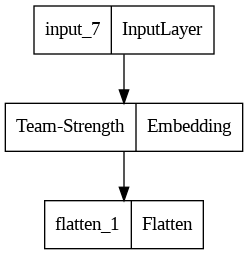

In [39]:
plot_model(team_strength_model)

In [40]:
from keras.layers import Concatenate, Dense

# Create an Input for each team
team_in_1 = Input(shape=(1,), name='Team-1-In')
team_in_2 = Input(shape=(1,), name='Team-2-In')

# Create an input for home vs away
home_in = Input(shape=(1,), name='Home-In')

# Lookup the team inputs in the team strength model
team_1_strength = team_strength_model(team_in_1)
team_2_strength = team_strength_model(team_in_2)

# Combine the team strengths with the home input using a Concatenate layer, then add a Dense layer
out = Concatenate()([team_1_strength, team_2_strength, home_in])
out = Dense(1)(out)

In [41]:
print(out)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_4/BiasAdd:0', description="created by layer 'dense_4'")


***Vous avez maintenant un modèle à 3 entrées !***

####**Faire un modèle et le compiler**

+ ***Maintenant que vous avez des couches d'entrée et de sortie pour le modèle à 3 entrées, encapsulez-les dans une classe de modèle Keras, puis compilez le modèle, afin de pouvoir l'adapter aux données et l'utiliser pour faire des prédictions sur de nouvelles données.***

####**Instructions**

+ Créez un modèle en utilisant team_in_1, team_in_2, et home_in comme entrées et outcomme sortie.
+ Compilez le modèle à l'aide de l'optimiseur 'adam' et 'mean_absolute_error'en tant que fonction de perte.

In [43]:
# Import the model class
from keras.models import Model

# Make a Model
model = Model([team_in_1, team_in_2, home_in], out)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

***Maintenant, notre modèle à 3 entrées est prêt à répondre à certaines données !***

####**Ajuster le modèle et évaluer**

+ ***Maintenant que vous avez défini un nouveau modèle, adaptez-le aux données de basket-ball de la saison régulière.***

+ ***Utilisez l' modelajustement de l'exercice précédent (qui a été entraîné sur les données de la saison régulière) et évaluez le modèle sur les données des matchs de tournoi (games_tourney).***

####**Instructions**

+ Ajustez le modèle au games_seasonjeu de données, en utilisant les colonnes 'team_1', 'team_2' et 'home' comme entrées, et la colonne 'score_diff' comme cible.
+ Ajustez le modèle en utilisant 1 époque, une répartition de validation de 10 % et une taille de lot de 2 048.
+ Évaluez le modèle sur games_tourney, en utilisant les mêmes entrées et sorties.

In [44]:
# Fit the model to the games_season dataset
model.fit([games_season['team_1'], games_season['team_2'], games_season['home']],
          games_season['score_diff'],
          epochs=1,
          verbose=True,
          validation_split=0.1,
          batch_size=2048)

138/138 [==============================] - 1s 3ms/step - loss: 11.9827 - val_loss: 12.5035


In [45]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Team-1-In (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 Team-2-In (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 Team-Strength-Model (Functiona  (None, 1)           10888       ['Team-1-In[0][0]',              
 l)                                                               'Team-2-In[0][0]']              
                                                                                                  
 Home-In (InputLayer)           [(None, 1)]          0           []                         

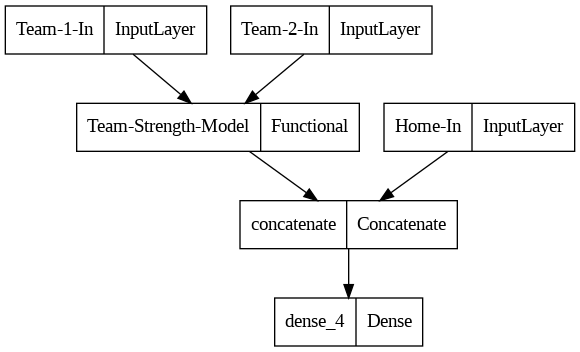

In [46]:
plot_model(model)

In [48]:
# Evaluate the model on the games_tourney dataset
print(model.evaluate([games_tourney['team_1'],
                      games_tourney['team_2'],
                      games_tourney['home']],
                     games_tourney['score_diff'],
                     verbose=False))

11.689010620117188


In [49]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Team-1-In (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 Team-2-In (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 Team-Strength-Model (Functiona  (None, 1)           10888       ['Team-1-In[0][0]',              
 l)                                                               'Team-2-In[0][0]']              
                                                                                                  
 Home-In (InputLayer)           [(None, 1)]          0           []                         

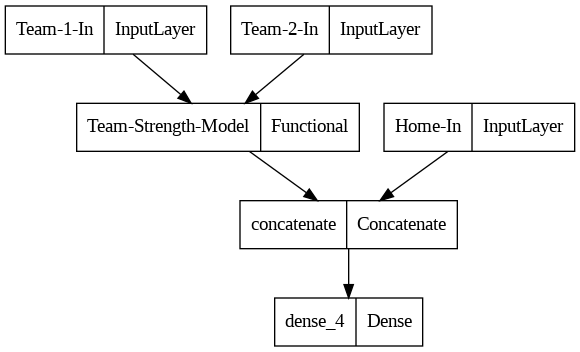

In [50]:
plot_model(model)

***Bien joué! Il est temps d'explorer davantage ce modèle.***

####**1. Résumer et tracer des modèles**

+ ***Dans cette leçon, vous examinerez de plus près votre modèle à trois entrées, en utilisant les méthodes intégrées `summary() et plot()` de Keras.***

####**2. Comprendre un résumé de modèle**

+ ***Voici le résumé pour un modèle Keras. Le résumé vous montre toutes les couches du modèle, ainsi que le nombre de paramètres de chaque couche. Il est important de noter que les modèles Keras peuvent avoir des paramètres non entraînables qui sont fixes et ne changent pas, ainsi que des paramètres entraînables, qui sont appris à partir des données lorsque le modèle est ajusté. Les modèles avec plus de paramètres entraînables sont généralement plus flexibles. Cela peut également les rendre plus enclins au surajustement. Les modèles avec moins de paramètres entraînables sont moins flexibles, mais donc moins susceptibles de sur-ajuster. Dans ce cas, le modèle a trois entrées. Étant donné qu'ils alimentent tous les trois une couche Dense, le modèle comporte quatre paramètres : un par entrée plus un biais ou une interception. Tous ces paramètres sont entraînables. Les paramètres d'apprentissage d'un modèle se trouvent généralement dans ses couches denses.***

####**3. Comprendre un résumé de modèle**

+ ***Voici le résumé d'un modèle un peu plus compliqué. Vous pouvez voir que ce modèle a une couche d'intégration. Même si la couche dense n'a toujours que 4 paramètres, le modèle a beaucoup plus de paramètres entraînables, en raison de la couche d'intégration. Il est important de se rappeler que l'incorporation de couches ajoute souvent un très grand nombre de paramètres entraînables à un modèle. Rappelez-vous que les couches d'intégration mappent des entiers à des flottants : chaque valeur unique de l'entrée d'intégration reçoit un paramètre pour sa sortie.***

####**4. Comprendre un modèle de parcelle !**

+ ***Voici le tracé d'un modèle très compliqué. La boîte au bas de l'image représente la sortie du modèle. Dans ce cas, le modèle a une sortie. Notez que les couches de sortie ont des flèches entrantes, mais pas de flèches sortantes. Les cases au milieu de l'image représentent les étapes intermédiaires du modèle. Ces cases ont des flèches qui entrent et des flèches qui sortent. Notez que ce modèle a un modèle partagé : le modèle de force d'équipe, qui est appliqué à deux des entrées avant qu'elles ne soient combinées dans la couche de concaténation avec la troisième entrée. Les cases en haut de l'image représentent les entrées. Ces cases n'ont qu'une seule flèche qui sort et aucune qui rentre.***

####**5. Comprendre un modèle de parcelle !**

+ ***Voici une autre façon de voir le même modèle, en utilisant les schémas de réseau que j'ai créés pour les modèles du chapitre précédent. Les modèles partagés fonctionnent exactement de la même manière que les calques partagés. Il s'agit d'une abstraction utile car vous pouvez assembler une séquence de couches pour définir un modèle personnalisé, puis partager le modèle entier exactement de la même manière que vous partageriez une couche. C'est un peu plus joli quand vous les faites à la main, mais la fonction de traçage automatique de Keras fait un bon travail en représentant la structure réelle du modèle.***

####**6. Pratiquons**

+ ***Maintenant que je vous ai montré comment résumer et tracer des modèles, essayez-le par vous-même !***

###**EXERCICES**

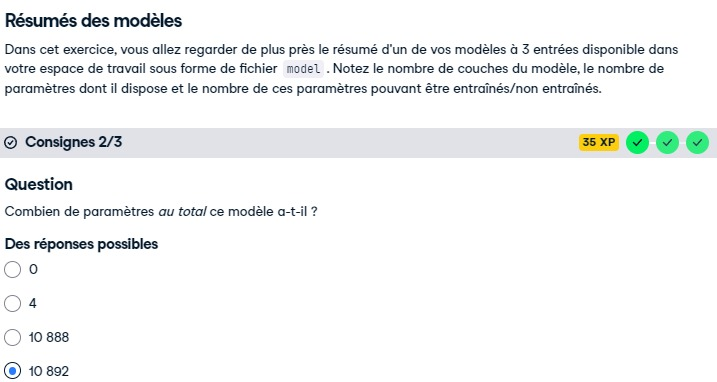

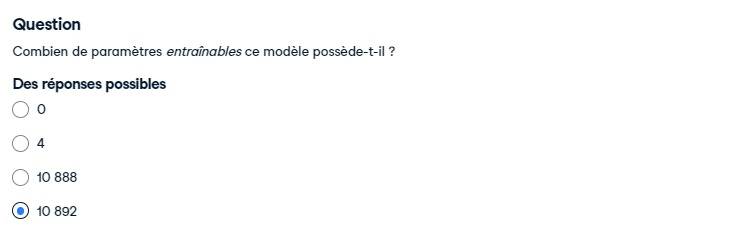

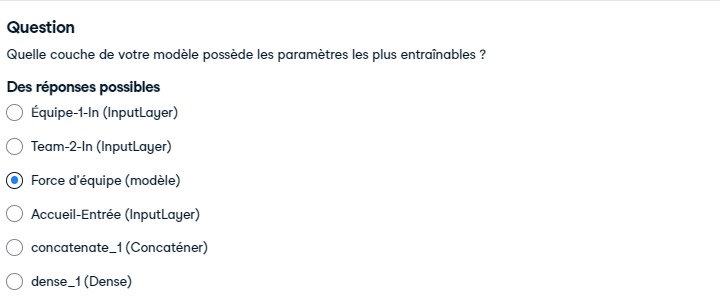

***Correct! Il est temps de tracer ce modèle.***

####**Tracé de modèles**
+ ***En plus de résumer votre modèle, vous pouvez également tracer votre modèle pour en avoir une idée plus intuitive. Votre modelest disponible dans l'espace de travail.***

####**Consignes**
+ Enregistrez le tracé du modèle dans le fichier 'model.png'.
+ Importez et affichez 'model.png' dans Python à l'aide de matplotlib.


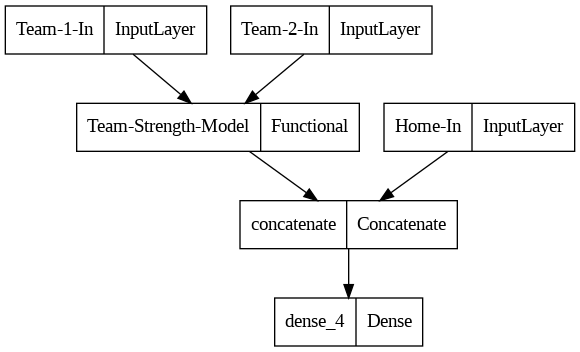

In [51]:
# Plot the model
plot_model(model, to_file='model.png')

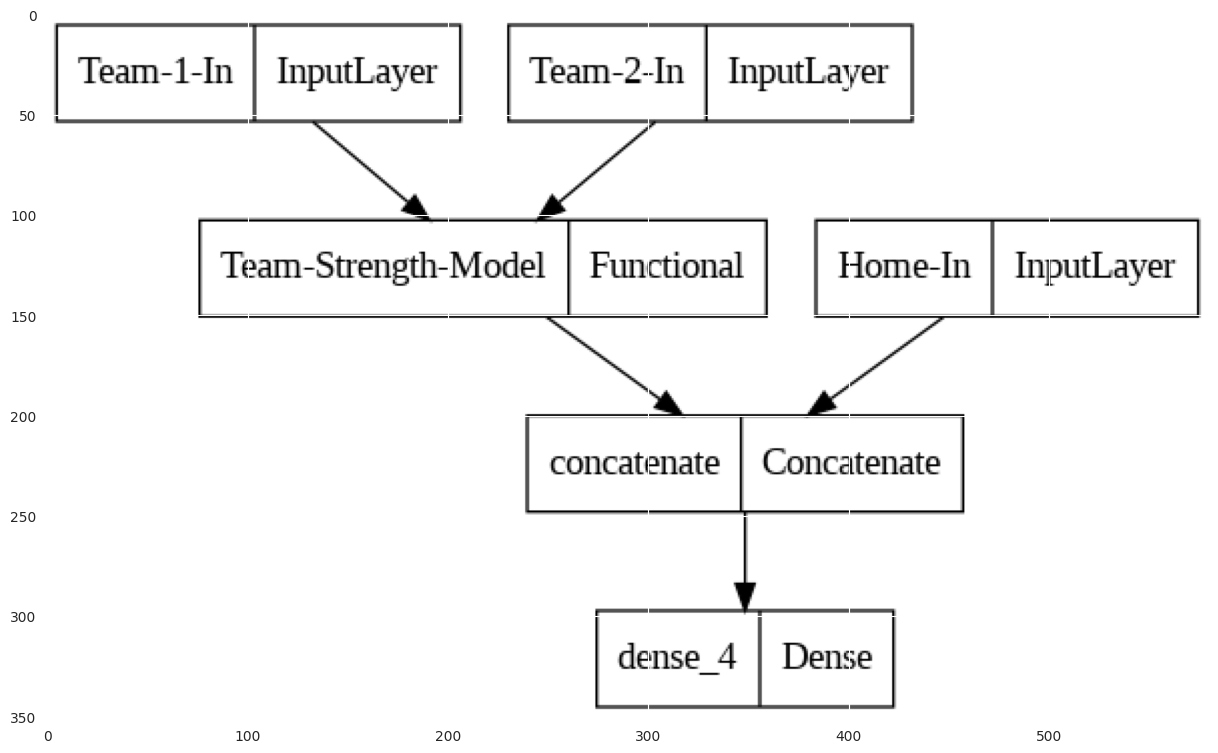

In [52]:
# Display the image
data = plt.imread('model.png')
plt.imshow(data)
plt.show()

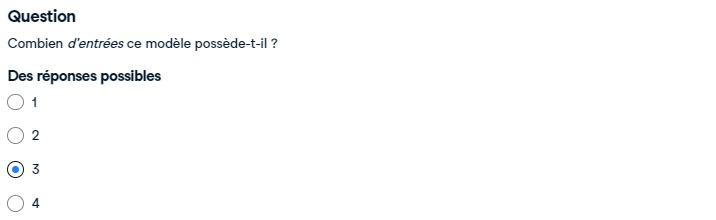

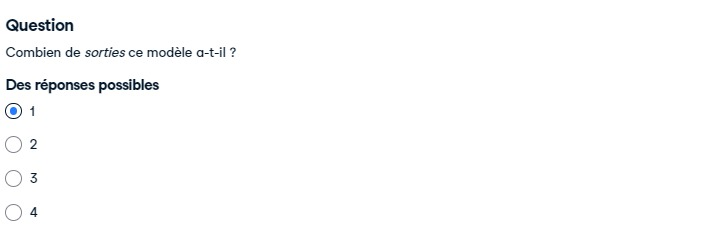

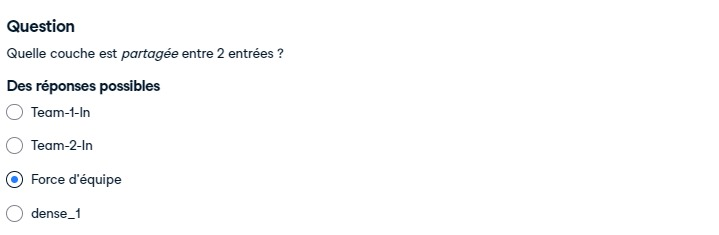

***Correct! Il est temps de passer aux modèles empilés.***

####**1. Modèles d'empilement**

+ ***Dans cette vidéo, je vais vous présenter le concept de "l'empilement de modèles" ou l'utilisation des prédictions d'un modèle comme entrée d'un autre modèle. L'empilement de modèles est un concept de science des données très avancé. C'est la manière la plus sophistiquée de combiner des modèles, et lorsqu'elle est bien faite, elle peut produire certains des modèles les plus précis qui existent. L'empilement de modèles est souvent utilisé pour gagner des compétitions populaires de modélisation prédictive.***

####**2. L'empilement des modèles nécessite 2 jeux de données**

+ ***Dans ce cours, vous avez travaillé avec deux ensembles de données : les données de basket-ball universitaire de la saison régulière et les données de basket-ball universitaire du tournoi d'après-saison. Les deux ensembles de données contiennent les deux équipes qui jouent, que l'équipe 1 soit à domicile ou à l'extérieur, et la différence de score des matchs. L'ensemble de données du tournoi contient en outre la différence de têtes de série des deux équipes jouant.***

####**3. Enrichir les données du tournoi**

+ ***Il y a beaucoup plus de données sur les matchs de saison régulière que sur les matchs de tournoi. L'ensemble de données de la saison régulière compte plus de 300 000 lignes, mais l'ensemble de données du tournoi ne compte qu'environ 4 000 lignes. 4 000 lignes de données, c'est assez petit. Rappelez-vous que notre couche d'intégration a environ 11 000 entrées. 4 000 lignes de données ne suffisent pas pour apprendre les 11 000 paramètres de notre couche d'intégration. Dans la leçon précédente, vous avez construit un modèle à trois entrées sur les données de la saison régulière. Vous pouvez réutiliser ce modèle pour ajouter des prédictions du modèle de saison régulière à l'ensemble de données du tournoi.***

####**4. Enrichir les données du tournoi**

+ ***Ce diagramme montre le processus d'empilement de ces 2 modèles. Vous commencez avec l'ensemble de données de la saison régulière et y adaptez un modèle. Vous prédisez ensuite sur l'ensemble de données du tournoi, en utilisant ce modèle. Cela vous donne des résultats de tournoi prédits, que vous pouvez maintenant utiliser pour créer un meilleur modèle des résultats réels du tournoi. Vous utilisez également les graines du tournoi lors de la modélisation du tournoi. Ces graines de tournoi proviennent d'un comité et sont destinées, comme votre modèle, à capturer la "force" de chaque équipe, sans utiliser de couche d'intégration. Les graines du tournoi peuvent être considérées comme une version simplifiée du modèle de force de votre équipe, déterminée par un humain plutôt que par un ordinateur.***

####**5. Modèle à 3 entrées avec données numériques pures**

+ ***La prédiction du modèle de saison régulière capture les effets de team_1 et team_2, ce qui signifie que vous n'avez plus besoin d'utiliser ces deux variables dans le modèle de tournoi et que vous pouvez éviter l'utilisation d'une couche d'intégration. Vous pouvez concentrer vos efforts de modélisation sur les données purement numériques, avec lesquelles il est un peu plus facile de travailler. Avec des entrées purement numériques, vous pouvez toutes les transmettre à une seule couche d'entrée.***

####**6. Modèle à 3 entrées avec données numériques pures**

+ ***En d'autres termes, une couche d'entrée avec une forme de 3 est une autre façon de définir un modèle à 3 entrées. Le seul inconvénient de cette approche est que toutes les entrées doivent être numériques.***

####**7. Modèle à 3 entrées avec données numériques pures**

+ ***Un énorme avantage de cette approche est la simplicité. Vous pouvez créer un modèle avec un seul tenseur d'entrée et un seul tenseur de sortie, et l'adapter à l'aide d'un seul jeu de données. De même, l'évaluation du modèle nécessite un seul ensemble de données, plutôt qu'une liste. Comme vous pouvez le voir, ce modèle empilé est assez précis ! Il est décalé, en moyenne, d'environ 9 points dans un match donné.***

####**8. Entraînons-nous !**

+ ***Pour récapituler : empiler des modèles Keras signifie utiliser les prédictions d'un modèle comme entrée d'un deuxième modèle. Lors de l'empilement, il est important d'utiliser des ensembles de données différents pour chaque modèle. Dans ce cas, vous utilisez les données de la saison régulière pour un modèle et l'ensemble de données du tournoi pour le second modèle. Enfin, si votre jeu de données d'entrée est purement numérique, vous pouvez placer plusieurs entrées dans une seule couche d'entrée. Entraînons-nous à utiliser ces concepts !***

###**EXERCICES**

####**Ajouter les prédictions du modèle aux données du tournoi**


+ ***Dans la leçon 1 de ce chapitre, vous avez utilisé le modèle de saison régulière pour faire des prédictions sur l'ensemble de données du tournoi, et vous avez obtenu de très bons résultats ! Essayez d'améliorer vos pronostics pour le tournoi en le modélisant spécifiquement.***

+ ***Vous utiliserez la prédiction du modèle de saison régulière comme entrée pour le modèle de tournoi. Il s'agit d'une forme d'« empilement de modèles ».***

+ *Pour commencer, prenez le modèle de saison régulière de la leçon précédente et prédisez sur les données du tournoi. Ajoutez cette prédiction aux données du tournoi dans une nouvelle colonne.*

####**Instructions**

+ Utilisez le modelpour prédire sur le games_tourneyjeu de données.
+ Le modèle a trois entrées : 'team_1', 'team_2'et 'home'colonnes.
+ Affectez les prédictions à une nouvelle colonne, 'pred'.

In [53]:
# Predict
games_tourney['pred'] = model.predict([games_tourney['team_1'], games_tourney['team_2'],
games_tourney['home']])

133/133 [==============================] - 0s 900us/step


In [54]:
games_tourney.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won,pred
0,1985,288,73,0,-3,-9,41,50,0,0.118415
1,1985,5929,73,0,4,6,61,55,1,0.120778
2,1985,9884,73,0,5,-4,59,63,0,0.109065
3,1985,73,288,0,3,9,50,41,1,0.105229
4,1985,3920,410,0,1,-9,54,63,0,0.131572


***Vous pouvez maintenant essayer de créer un modèle pour les données du tournoi en fonction de vos prévisions de saison régulière.***

####**Créer une couche d'entrée avec plusieurs colonnes**

+ ***Dans cet exercice, vous découvrirez une manière différente de créer des modèles avec plusieurs entrées. Cette méthode ne fonctionne que pour les données purement numériques, mais c'est une approche beaucoup plus simple pour créer des réseaux de neurones multivariés.***

+ ***Vous avez maintenant trois colonnes numériques dans l'ensemble de données du tournoi : 'seed_diff', 'home' et 'pred'. Dans cet exercice, vous allez créer un réseau neuronal qui utilise une seule couche d'entrée pour traiter ces trois entrées numériques.***

+ *Ce modèle devrait avoir une seule sortie pour prédire la différence de score des matchs du tournoi.*

####**Instructions**

+ Créez une seule couche d'entrée avec 3 colonnes.
+ Connectez cette entrée à une couche Dense avec 1 unité.
+ Créez un modèle avec input_tensor comme entrée et output_tensor comme sortie.
+ Compilez le modèle avec 'adam' comme optimiseur et 'mean_absolute_error' comme fonction de perte.

In [57]:
# Create an input layer with 3 columns
input_tensor = Input((3,))

# Pass it to a Dense layer with 1 unit
output_tensor = Dense(1)(input_tensor)

# Create a model
model = Model(input_tensor,output_tensor)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [58]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


***Votre modèle est maintenant prêt à répondre à certaines données !***

####**Adapter le modèle**

+ ***Maintenant que vous avez enrichi l'ensemble de données du tournoi et créé un modèle pour utiliser les nouvelles données, adaptez ce modèle aux données du tournoi.***

+ ***Notez que cela modeln'a qu'une seule couche d'entrée capable de gérer les 3 entrées, donc ses entrées et sorties n'ont pas besoin d'être une liste.***

+ *Les jeux de tournoi sont divisés en un ensemble d'entraînement et un ensemble de test. Les matchs du tournoi avant 2010 sont dans le set d'entraînement, et ceux après 2010 sont dans le set de test.*

####**Instructions**

+ Ajustez le modèle à l'ensemble de données games_tourney_train en utilisant 1 époque.
+ Les colonnes d'entrée sont 'home', 'seed_diff'et 'pred'.
+ La colonne cible est 'score_diff'.

In [59]:
from sklearn.model_selection import train_test_split

games_tourney_train = games_tourney[games_tourney['season'] <= 2010]
games_tourney_test = games_tourney[games_tourney['season'] > 2010]

In [60]:
# Fit the model
model.fit(games_tourney_train
[['home', 'seed_diff', 'pred']],
          games_tourney_train['score_diff'],
          epochs=1,
          verbose=True)

103/103 [==============================] - 0s 1ms/step - loss: 10.1240


In [61]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


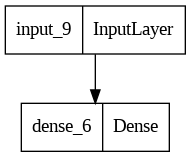

In [62]:
plot_model(model)

***Dans le prochain exercice, vous verrez si notre modèle est bon !***

####**Évaluer le modèle**

+ ***Maintenant que vous avez adapté votre modèle aux données d'entraînement du tournoi, évaluez-le sur les données de test du tournoi. Rappelons que les données de test du tournoi contiennent des jeux postérieurs à 2010.***

####**Instructions**

+ Évaluer le modèle sur les données games_tourney_test.
+ Rappelez-vous que les entrées du modèle sont 'home', 'seed_diff' et 'prediction' les colonnes et que la colonne cible est 'score_diff'.

In [64]:
# Evaluate the model on the games_tourney_test dataset
print(model.evaluate(games_tourney_test[['home', 'seed_diff', 'pred']],
               games_tourney_test['score_diff'], verbose=False))

9.733223915100098


In [65]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


***Votre modèle fonctionne plutôt bien sur les données à l'avenir !***

####**1. Modèles à deux sorties**

+ ***Dans ce chapitre, je couvrirai les réseaux de neurones avec 2 sorties. Ces types de réseaux font des prédictions pour 2 cibles à la fois. Par exemple, vous pouvez utiliser un modèle unique pour prédire les scores des deux équipes lors d'un match de basket-ball ou utiliser un modèle unique pour prédire à la fois la différence de score et le résultat victoire/défaite de ce match. Pour moi, c'est le chapitre le plus intéressant du cours, car il vous apprend des choses que seuls les réseaux de neurones peuvent faire. À la fin du chapitre, je vous montrerai comment créer un modèle unique qui soit à la fois un classifieur et un régresseur.***

####**2. Modèle simple à 2 sorties**

+ ***Pour créer un modèle à 2 sorties, on commence par une couche d'entrée, comme pour tous les modèles keras. Dans cet exemple, il n'y a qu'un seul prédicteur, j'utilise donc une couche d'entrée avec une seule entrée. Pour faire un modèle à 2 sorties, je fais simplement une couche Dense avec 2 unités pour la couche de sortie. Le modèle va maintenant faire 2 prédictions ! Comparez ce modèle avec les modèles des chapitres précédents, qui avaient tous des sorties uniques, et donc des couches de sortie denses avec une seule unité. La seule différence entre le modèle à 2 sorties et le modèle à une sortie est la taille de la couche de sortie.***

####**3. Modèle simple avec 2 sorties**

+ ***L'API pour créer un modèle à 2 sorties et le compiler est exactement la même que pour un modèle à une seule sortie. Enveloppez les tenseurs d'entrée et de sortie dans votre appel à Model(), puis compilez-le à l'aide de l'optimiseur adam et de l'erreur absolue moyenne.***

####**4. Montage d'un modèle à 2 sorties**

+ ***Pour ajuster un modèle avec 2 sorties, vous utilisez un jeu de données avec 2 colonnes pour la variable y. Dans ce cas, l'ensemble d'entraînement a la différence de tête de série pour les deux équipes, ainsi que les scores de l'équipe pour le match. La seule entrée du modèle est la différence de graines et les 2 sorties sont les scores de chaque équipe. L'appel d'ajustement est alors exactement le même qu'un modèle à entrée unique et sortie unique. La différence est que la variable y a maintenant 2 colonnes. Ce modèle particulier prend un certain temps à converger, j'utilise donc 500 époques dans l'ajustement. Pour les exercices, vous utiliserez des données supplémentaires dans le modèle qui l'aideront à converger plus rapidement.***

####**5. Inspection d'un modèle à 2 sorties**

+ ***Maintenant que le modèle est adapté, vous pouvez jeter un œil à ce qu'il a appris. La couche dense a deux poids et deux biais. Les pondérations indiquent que chaque unité supplémentaire de différence de départ pour les données d'entrée équivaut à environ 0,60 points supplémentaires pour l'équipe 1 (et 0,60 points de moins pour l'équipe 2). Le biais, ou terme d'interception pour chaque équipe est d'environ 70 points, ce qui indique que nous nous attendons à ce qu'une équipe de basket-ball moyenne marque environ 70 points dans un match moyen. En d'autres termes, 2 équipes avec une différence de tête de série de 1 point devraient avoir un score d'environ 69 à 71, tandis que 2 équipes avec une différence de tête de série de 10 points devraient avoir un score d'environ 64 à 76.***

####**6. Évaluation d'un modèle à 2 sorties**

+ ***L'évaluation d'un modèle avec deux sorties est très similaire à l'évaluation d'un modèle avec 1 sortie, sauf que vous fournissez à la fonction d'évaluation un jeu de données avec 2 colonnes de données pour la cible. Dans ce cas, le modèle fonctionne raisonnablement bien sur l'ensemble de test, mais dans les exercices, vous ajouterez des données supplémentaires pour obtenir de meilleures prédictions.***

####**7. Entraînons-nous !**

+ ***Maintenant que je vous ai montré comment adapter un modèle à 2 sorties, vous pouvez vous entraîner à le faire vous-même.***


###**EXERCICES**

####**Modèle simple à deux sorties**

+ ***Dans cet exercice, vous allez utiliser les données du tournoi pour créer un modèle qui fait deux prédictions : les scores des deux équipes dans un match donné. Vos entrées seront la différence de tête de série des deux équipes, ainsi que la différence de score prévue à partir du modèle que vous avez construit au chapitre 3.***

+ *La sortie de votre modèle sera le score prédit pour l'équipe 1 ainsi que pour l'équipe 2. C'est ce qu'on appelle la "régression à cibles multiples": un modèle faisant plus d'une prédiction.*

####**Instructions**

+ Créez une seule couche d'entrée avec 2 colonnes.
+ Connectez cette entrée à une couche Dense avec 2 unités.
+ Créez un modèle avec input_tensorcomme entrée et output_tensor comme sortie.
+ Compilez le modèle avec 'adam'comme optimiseur et 'mean_absolute_error'comme fonction de perte.

In [66]:
# Define the input
input_tensor = Input(shape=(2,))

# Define the output
output_tensor = Dense(2)(input_tensor)

# Create a model
model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [67]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_7 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


***Vous avez maintenant un modèle à sorties multiples !***

####**Adapter un modèle à deux sorties**

+ ***Maintenant que vous avez défini votre modèle à 2 sorties, adaptez-le aux données du tournoi. J'ai divisé les données en games_tourney_train and games_tourney_test, utilisez donc l'ensemble d'entraînement pour l'instant.***

+ ***Ce modèle utilisera les graines de pré-tournoi, ainsi que vos prédictions de pré-tournoi à partir du modèle de saison régulière que vous avez construit précédemment dans ce cours.***

+ *Pour rappel, ce modèle prédira les scores des deux équipes.*

####**Instructions**

+ Ajustez le modèle à l'ensemble de données games_tourney_train en utilisant 100 époques et une taille de lot de 16 384.
+ Les colonnes d'entrée sont 'seed_diff', et 'pred'.
+ Les colonnes cibles sont 'score_1'et 'score_2'.

In [68]:
games_tourney = pd.read_csv('games_tourney.csv')
games_tourney.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0


In [69]:
games_season = pd.read_csv('games_season.csv')
games_season.head()

,season,team_1,team_2,home,score_diff,score_1,score_2,won
0,1985,3745,6664,0,17,81,64,1
1,1985,126,7493,1,7,77,70,1
2,1985,288,3593,1,7,63,56,1
3,1985,1846,9881,1,16,70,54,1
4,1985,2675,10298,1,12,86,74,1


In [70]:
from keras.layers import Embedding, Input, Flatten, Concatenate, Dense
from keras.models import Model

# Count the unique number of teams
n_teams = np.unique(games_season['team_1']).shape[0]

# Create an embedding layer
team_lookup = Embedding(input_dim=n_teams,
                        output_dim=1,
                        input_length=1,
                        name='Team-Strength')

# Create an input layer for the team ID
teamid_in = Input(shape=(1, ))

# Lookup the input in the team strength embedding layer
strength_lookup = team_lookup(teamid_in)

# Flatten the output
strength_lookup_flat = Flatten()(strength_lookup)

# Combine the operations into a single, re-usable model
team_strength_model = Model(teamid_in, strength_lookup_flat, name='Team-Strength-Model')

# Create an Input for each team
team_in_1 = Input(shape=(1, ), name='Team-1-In')
team_in_2 = Input(shape=(1, ), name='Team-2-In')

# Create an input for home vs away
home_in = Input(shape=(1, ), name='Home-In')

# Lookup the team inputs in the team strength model
team_1_strength = team_strength_model(team_in_1)
team_2_strength = team_strength_model(team_in_2)

# Combine the team strengths with the home input using a Concatenate layer,
# then add a Dense layer

out = Concatenate()([team_1_strength, team_2_strength, home_in])
out = Dense(1)(out)

# Make a model
p_model = Model([team_in_1, team_in_2, home_in], out)

# Compile the model
p_model.compile(optimizer='adam', loss='mean_absolute_error')

# Fit the model to the games_season dataset
p_model.fit([games_season['team_1'], games_season['team_2'], games_season['home']],
          games_season['score_diff'],
          epochs=1, verbose=True, validation_split=0.1, batch_size=2048)

games_tourney['pred'] = p_model.predict([games_tourney['team_1'],
                                       games_tourney['team_2'],
                                       games_tourney['home']])

133/133 [==============================] - 0s 903us/step


In [71]:
games_tourney_train = games_tourney[games_tourney['season'] <= 2010]
games_tourney_test = games_tourney[games_tourney['season'] > 2010]

In [72]:
# Fit the model
model.fit(games_tourney_train[['seed_diff', 'pred']],
  		  games_tourney_train[['score_1', 'score_2']],
  		  verbose=True,
  		  epochs=100,
  		  batch_size=16384)

Epoch 1/100
1/1 [==============================] - 0s 277ms/step - loss: 71.7994
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 71.7983
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 71.7971
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 71.7960
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 71.7949
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 71.7937
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 71.7926
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 71.7915
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 71.7903
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 71.7892
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 71.7881
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 71.7869
Epoch 13/100
1/1 [==========================

***Bon travail! Regardons les poids du modèle.***

####**Inspectez le modèle (I)**

+ ***Maintenant que vous avez ajusté votre modèle, examinons-le. Vous pouvez utiliser la méthode `.get_weights()` pour inspecter les poids de votre modèle.***

+ ***La couche d'entrée aura 4 poids : 2 pour chaque entrée fois 2 pour chaque sortie.***

+ *La couche de sortie aura 2 poids, un pour chaque sortie.*

####**Instructions**

+ Imprimer les poids de model.
+ Imprimez les moyennes de colonne des données d'entraînement (games_tourney_train).

In [73]:
# Print the model's weights
print(model.get_weights())

[array([[-1.1840825 ,  0.93391407],
       [-0.80006707,  0.8110393 ]], dtype=float32), array([0.09999934, 0.09999934], dtype=float32)]


In [74]:
# Print the column means of the training data
print(games_tourney_train[['seed_diff', 'pred']].mean())

seed_diff    0.000000
pred         0.134333
dtype: float64


***Avez-vous remarqué que les deux poids de sortie sont d'environ ~72 ? En effet, en moyenne, une équipe marquera environ 72 points dans le tournoi.***

####**Évaluer le modèle**

+ ***Maintenant que vous avez ajusté votre modèle et inspecté ses pondérations pour vous assurer qu'il est logique, évaluez-le sur l'ensemble de test du tournoi pour voir comment il fonctionne sur de nouvelles données.***

####**Instructions**

+ Évaluez le modèle sur games_tourney_test.
+ Utilisez les mêmes entrées et sorties que l'ensemble de formation.

In [75]:
# Evaluate the model on the tournament test data
print(model.evaluate(games_tourney_test[['seed_diff', 'pred']], games_tourney_test[['score_1', 'score_2']], verbose=False))

68.7276382446289


***Ce modèle est assez précis pour prédire les scores des tournois !***

####**1. Modèle unique de classification et de régression**

+ ***Dans cette leçon, je vais montrer comment créer un modèle simple qui effectue à la fois la classification et la régression.**

####**2. Construire un régresseur/classificateur simple**

+ ***Ceci est un autre exemple de modèle à deux sorties. Dans ce cas, cependant, plutôt que d'utiliser deux sorties de régression, j'ai une sortie de régression et une sortie de classification. Comme précédemment, je définis la partie régression de ce modèle avec une seule entrée et une couche de sortie Dense avec une seule unité. Pour la partie classification du modèle, j'utilise la prédiction du modèle de régression comme entrée, puis j'ajoute une autre couche de sortie Dense en utilisant l'activation sigmoïde, qui mappera les différences de score prévues aux probabilités que l'équipe 1 gagne.***

####**3. Créer un modèle de régresseur/classificateur**

+ ***Avec deux modèles de sortie, chaque sortie a besoin de sa propre fonction de perte. Pour ce modèle, j'ai spécifié deux fonctions de perte différentes, une pour le modèle de régression et une pour le modèle de classification. Comme pour tous les modèles de ce cours, j'ai utilisé Adam pour l'optimiseur.***

####**4. Ajuster la combinaison classificateur/régresseur**

+ ***Pour ajuster la combinaison du modèle de classification/régression, vous devez fournir les données y sous forme de liste. Rappelez-vous que cela est similaire à la façon dont vous avez construit deux modèles d'entrée au chapitre 2. Utilisez seed_difference comme seule entrée de ce modèle. Pour la sortie de régression, j'utilise score_difference, et pour la sortie de classification, j'utilise si oui ou non l'équipe 1 a gagné le match. Je sépare ces deux variables de l'ensemble d'apprentissage et les transmets à la méthode d'ajustement sous forme de liste. Ce modèle s'adapte un peu plus rapidement que le précédent, donc je n'utilise que 100 époques.***

####**5. Regardez les poids du modèle**

+ ***La structure de pondération de ce modèle est un peu différente de celle du dernier modèle, où les deux sorties étaient des cibles de régression. La première couche a un poids de 1,24 et un biais presque nul. Cela signifie qu'un changement d'une unité dans la différence de tête de série des équipes rapporte environ 1,24 points supplémentaires dans leur différence de score. Ainsi, 2 équipes avec une différence de tête de série de 1 devraient voir l'équipe 1 gagner par 1,2 point. Mais 2 équipes avec une différence de tête de série de 10 devraient voir l'équipe 1 gagner par 12 points. La couche suivante mappe la différence de score prévue avec les gains/pertes prévus. Rappelez-vous que la dernière couche du modèle utilise l'activation sigmoïde.***

####**6. Regardez les poids du modèle**

+ ***Vous pouvez calculer manuellement la dernière couche du modèle pour certains exemples de données, afin de comprendre comment le modèle a appris à associer la différence de score aux probabilités de gain. Scipy a une fonction appelée expit(), qui est une implémentation efficace de la fonction sigmoïde. Calculons manuellement la probabilité de victoire pour 2 équipes qui devraient avoir une différence de score de 1. Tout d'abord, multipliez 1 par le poids de la dernière couche du modèle : 0,14. Ajoutez le biais pour la dernière couche : 0,0007. Comme le biais est très proche de zéro, le résultat est toujours de 0,14. Enfin, nous appliquons la fonction sigmoïde à 0,14, ce qui donne une prédiction de 0,54. En d'autres termes, le modèle a appris qu'une différence de score attendue de 1 point est égale à une probabilité de gain attendue de 54 %.***

####**7. Évaluer le modèle sur de nouvelles données**

+ ***Enfin, vous pouvez évaluer le modèle sur de nouvelles données. Tout d'abord, divisez l'ensemble de données d'évaluation en une cible de régression et une cible de classification, et fournissez la même liste de 2 cibles à la méthode évalue(). Cela produit maintenant 3 nombres, au lieu de 1 comme avec les modèles que nous avons examinés dans d'autres chapitres. Le premier nombre est la fonction de perte utilisée par le modèle, qui est la somme de toutes les pertes de sortie. Le deuxième nombre est la perte pour la partie régression du modèle, et le troisième nombre est la perte pour la partie classification du modèle. Notre modèle a donc une erreur absolue moyenne de 9,28 et une perte de log de 0,58, ce qui est plutôt bon, mais je pense que vous pouvez faire mieux avec plus de données lorsque vous essayez par vous-même.***

####**8. Maintenant, vous essayez !**

+ ***Maintenant, vous essayez d'ajuster votre propre modèle de combinaison régression-classification !***

###**EXERCICES**

####**Classification et régression dans un modèle**

+ ***Vous allez maintenant créer un autre type de modèle à 2 sorties. Cette fois, vous prédisez la différence de score, au lieu des scores des deux équipes, puis vous prédisez la probabilité que l'équipe 1 gagne la partie. C'est un modèle plutôt cool : il va faire à la fois de la classification et de la régression !***

+ ***Dans ce modèle, désactivez le biais ou interceptez pour chaque couche. Vos entrées (différence de départ et différence de score prévue) ont une moyenne très proche de zéro, et vos sorties ont toutes deux des moyennes proches de zéro, de sorte que votre modèle ne devrait pas avoir besoin du terme de biais pour bien s'adapter aux données.***

####**Instructions**

+ Créez une seule couche d'entrée avec 2 colonnes.
+ La première couche de sortie doit avoir 1 unité avec 'linear'activation et sans terme de polarisation.
+ La deuxième couche de sortie doit avoir 1 unité avec 'sigmoid'activation et sans terme de polarisation.
+ Utilisez également la première couche de sortie comme entrée de cette couche.
+ Créez un modèle avec ces entrées et ces sorties.

In [76]:
# Create an input layer with 2 columns
input_tensor = Input(shape=(2,))

# Create the first output
output_tensor_1 = Dense(1, activation='linear', use_bias=False)(input_tensor)

# Create the second output (use the first output as input here)
output_tensor_2 = Dense(1, activation='sigmoid', use_bias=False)(output_tensor_1)

# Create a model with 2 outputs
model = Model(input_tensor, [output_tensor_1, output_tensor_2])

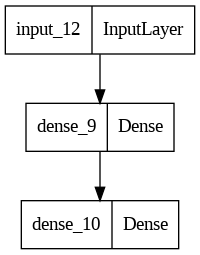

In [77]:
plot_model(model)

***Ce type de modèle n'est possible qu'avec un réseau de neurones.***

####**Compiler et ajuster le modèle**

+ ***Maintenant que vous avez un modèle avec 2 sorties, compilez-le avec 2 fonctions de perte : erreur absolue moyenne (MAE) pour 'score_diff'et entropie croisée binaire (également appelée logloss) pour 'won'. Ajustez ensuite le modèle avec 'seed_diff'et 'pred'comme entrées. Pour les sorties, prédire 'score_diff'et 'won'.***

+ ***Ce modèle peut utiliser les scores des jeux pour s'assurer que les jeux serrés (petit écart de score) ont des probabilités de victoire plus faibles que les éruptions (grand écart de score).***

+ *Le problème de régression est plus facile que le problème de classification car MAE punit moins le modèle pour une perte due au hasard. Par exemple, si score_diff vaut -1 et won vaut 0, cela signifie team_1 qu'il a eu de la malchance et qu'il a perdu par un seul lancer franc. Les données du problème facile aident le modèle à trouver une solution au problème difficile.*

Instructions

+ Importer Adam depuis keras.optimizers.
+ Compilez le modèle avec 2 pertes :
 + 'mean_absolute_error'et 'binary_crossentropy', et utilisez l'optimiseur Adam avec un taux d'apprentissage de 0,01.
  + Ajustez le modèle avec les colonnes 'seed_diff' et 'pred'comme entrées et les colonnes 'score_diff'et 'won'comme cibles.
  + Utilisez 10 époques et une taille de lot de 16384.

In [78]:
# Import the Adam optimizer
from keras.optimizers import Adam

# Compile the model with 2 losses and the Adam optimzer with a higher learning rate
model.compile(loss=['mean_absolute_error', 'binary_crossentropy'], optimizer=Adam(0.01))

# Fit the model to the tournament training data, with 2 inputs and 2 outputs
model.fit(games_tourney_train[['seed_diff', 'pred']],
          [games_tourney_train[['score_diff']], games_tourney_train[['won']]],
          epochs=10,
          verbose=True,
          batch_size=16384)

Epoch 1/10
1/1 [==============================] - 0s 483ms/step - loss: 12.3746 - dense_9_loss: 11.5629 - dense_10_loss: 0.8117
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 12.3565 - dense_9_loss: 11.5240 - dense_10_loss: 0.8325
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 12.3389 - dense_9_loss: 11.4854 - dense_10_loss: 0.8535
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 12.3217 - dense_9_loss: 11.4472 - dense_10_loss: 0.8745
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 12.3047 - dense_9_loss: 11.4093 - dense_10_loss: 0.8954
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 12.2880 - dense_9_loss: 11.3718 - dense_10_loss: 0.9162
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 12.2713 - dense_9_loss: 11.3347 - dense_10_loss: 0.9366
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 12.2549 - dense_9_loss: 11.2981 - dense_10

***Vous venez d'ajuster un modèle qui est à la fois un classifieur et un régresseur !***

####**Inspectez le modèle (II)**

+ ***Maintenant, vous devriez jeter un œil aux poids de ce modèle. En particulier, notez le dernier poids du modèle. Ce poids convertit la différence de score prédite en une probabilité de gain prédite. Si vous multipliez la différence de score prévue par le dernier poids du modèle, puis appliquez la fonction sigmoïde, vous obtenez la probabilité de gain du jeu.***

####**Consignes**
+ Imprimer les poids de model .
+ Imprimez les moyennes de colonne des données d'entraînement (games_tourney_train).
+ Imprimez la probabilité de gain approximative prévue pour un match serré (différence de 1 point).
+ Imprimez le jeu d'éruption prédit par probabilité de gain approximative (différence de 10 points).

In [79]:
# Print the model weights
print(model.get_weights())

[array([[0.156883  ],
       [0.90213764]], dtype=float32), array([[-0.7361375]], dtype=float32)]


In [80]:
# Print the training data means
print(games_tourney_train[['seed_diff', 'pred']].mean())

seed_diff    0.000000
pred         0.134333
dtype: float64


In [81]:
from scipy.special import expit as sigmoid

# Weight from the model
weight = 0.14

# Print the approximate win probability of a predicted close game
print(sigmoid(1 * weight))

0.5349429451582145


In [82]:
# Print the approximate win probability of a predicted blowout game
print(sigmoid(10 * weight))

0.8021838885585818


***Il en va de même sigmoid(1 * 0.14)pour 0,53, ce qui représente un jeu assez serré et sigmoid(10 * 0.14)pour 0,80, ce qui représente une victoire assez probable. En d'autres termes, si le modèle prédit un gain de 1 point, il est moins sûr du gain que s'il prédit 10 points. Qui a dit que les réseaux de neurones étaient des boîtes noires ?***


####**Évaluer sur de nouvelles données avec deux métriques**

+ ***Maintenant que vous avez ajusté votre modèle et inspecté ses pondérations pour vous assurer qu'elles sont logiques, évaluez votre modèle sur l'ensemble de test du tournoi pour voir comment il fonctionne sur de nouvelles données.***

+ ***Notez que dans ce cas, Keras renverra 3 nombres : le premier nombre sera la somme des deux fonctions de perte, puis les 2 nombres suivants seront les fonctions de perte que vous avez utilisées lors de la définition du modèle.***

+ *Prêt à faire passer votre apprentissage en profondeur au niveau supérieur ? Consultez ["Réseaux de neurones convolutifs pour le traitement d'images"]().*

####**Instructions**

+ Évaluez le modèle sur games_tourney_test.
+ Utilisez les mêmes entrées et sorties que l'ensemble de formation.

In [83]:
# Evaluate the model on new data
print(model.evaluate(games_tourney_test[['seed_diff', 'pred']],
               [games_tourney_test[['score_diff']], games_tourney_test[['won']]], verbose=False))

[11.756247520446777, 10.77940559387207, 0.9768423438072205]


***Il s'avère que vous pouvez avoir votre gâteau et le manger aussi ! Ce modèle est à la fois un bon régresseur et un bon classifieur !***